# **PRODUCT DELIVERY PREDICTION**

## **INTRODUCTION**

### **Objectives**

The goal of this endeavor is to devise a predictive model for an international e-commerce company, determining the timeliness of product deliveries. We seek to unravel the intricate web of factors that influence delivery outcomes and gain a deeper understanding of customer behavior patterns. At the heart of this project lies the company's aspiration to harness cutting-edge machine learning techniques to extract meaningful insights from their vast customer database. Specializing in the sale of electronic goods, the company stands at the threshold of data-driven decision-making that promises to revolutionize their operational efficiency and customer satisfaction metrics.

### **Dataset**

The dataset contains 10.999 observations of 12 variables and was received from [Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics) The data contains the following information:

| Column           | Description                                                                                   |
|---------------------|-----------------------------------------------------------------------------------------------|
| ID                  | ID Number of Customers                                                                        |
| Warehouse_block     | The Company have big Warehouse which is divided into block such as A,B,C,D,E                 |
| Mode_of_Shipment   | The Company Ships the products in multiple way such as Ship, Flight and Road                  |
| Customer_care_calls | The number of calls made from enquiry for enquiry of the shipment                             |
| Customer_rating     | The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)  |
| Cost_of_the_Product| Cost of the Product in US Dollars                                                             |
| Prior_purchases     | The Number of Prior Purchase                                                                  |
| Product_importance  | The company has categorized the product in the various parameter such as low, medium, high   |
| Gender              | Male and Female                                                                               |
| Discount_offered    | Discount offered on that specific product                                                     |
| Weight_in_gms       | It is the weight in grams                                                                     |
| Reached.on.Time_Y.N | It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time |


## **GATHERING, CLEANSING, TRANSFORMATION**

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter

# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Modeling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [263]:
# Read data
df = pd.read_csv("../data/train.csv")

# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [264]:
# Show first rows
print("First rows:")
display(df.head(5))


First rows:


ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [265]:
# Removing the 'ID' column
df.drop(columns=['ID'], inplace=True, errors='ignore')

# Number of rows before removing duplicates
before_rm = len(df)

# Removing duplicates across all rows
df.drop_duplicates(inplace=True)

# Number of rows after removing duplicates
after_rm = len(df)

# Number of duplicates removed
removed_duplicates = before_rm - after_rm

print("Number of removed duplicates:", removed_duplicates)

Number of removed duplicates: 0


In [266]:
# Show missing values
df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [267]:
# Show descriptive statistics
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

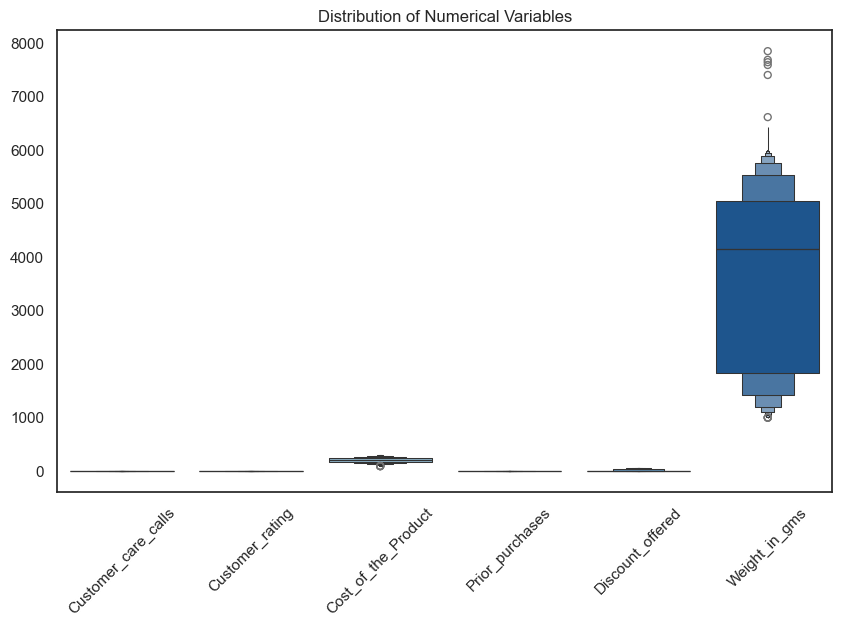

In [268]:
# Selecting only numeric columns for the boxenplot (excluding 'Reached_on_Time_Y_N' if it's not numeric)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Reached.on.Time_Y.N')  # Remove the column if you know its name

# Creating the boxenplot using only numeric columns
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df[numeric_columns], palette="Blues")
plt.xticks(rotation=45)
plt.title('Distribution of Numerical Variables')
plt.show()

The boxplot visualizes the distribution of various numerical variables within a dataset. The weight in grams ('Weight_in_gms') seems to have a wide range of values, exhibiting a substantial spread as indicated by the elongated box and the far-reaching whiskers, which suggest variability in the shipping weights of the items. The other variables such as customer care calls, customer rating, cost of the product, prior purchases, and discount offered appear to have a much narrower distribution, indicated by the shorter boxes and whiskers, which suggest less variability among their values. Few Outliers might be present, especially for the weight in grams, as denoted by the points beyond the whiskers.

In [269]:
# Define a list of columns to display unique values for
columns_to_inspect = [
    'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Reached.on.Time_Y.N', 
]

# Loop through the columns to iterate and display unique values for each column
for column in columns_to_inspect:
    # Check if the column exists in the DataFrame, as exact column names might vary
    if column in df.columns:
        # Print unique values found in the column
        print(f"Unique values in '{column}': {df[column].unique()}")
    else:
        # Notify if the column does not exist in the DataFrame
        print(f"Column '{column}' does not exist in the DataFrame.")


Unique values in 'Customer_care_calls': [4 2 3 5 6 7]
Unique values in 'Customer_rating': [2 5 3 1 4]
Unique values in 'Prior_purchases': [ 3  2  4  6  5  7 10  8]
Unique values in 'Reached.on.Time_Y.N': [1 0]


In [270]:
# Replace values in target column
df["Reached.on.Time_Y.N"] = df["Reached.on.Time_Y.N"].replace({1: 'Not on time', 0: 'On time'}).astype("category")

# Renaming the column 'Reached.on.Time_Y.N' to 'target'
df.rename(columns={'Reached.on.Time_Y.N': 'target'}, inplace=True)

# Print the first 5 rows
display(df.head())

df.info()


Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms       target  
0                44           1233  Not on time  
1                59           3088  Not on time  
2                48           3374  Not on time  
3                10           1177  Not on time  
4                46           2484  Not on time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      10999 non-null  object  
 1   Mode_of_Shipment     10999 non-null  object  
 2   Customer_care_calls  10999 non-null  int64   
 3   Customer_rating      10999 non-null  int64   
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  int64   
 6   Product_importance   10999 non-null  object  
 7   Gender               10999 non-null  object  
 8   Discount_offered     10999 non-null  int64   
 9   Weight_in_gms        10999 non-null  int64   
 10  target               10999 non-null  category
dtypes: category(1), int64(6), object(4)
memory usage: 870.3+ KB


## **EXPLORATORY DATA ANALYSIS**
Exploratory Data Analysis (EDA) is a critical initial step in the data science workflow, aimed at understanding the dynamics and structure of the data before formal modeling begins. EDA involves summarizing main characteristics, often with visual methods, to uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

The purpose of EDA is to use statistical graphics and other data visualization techniques to get a clear insight into the data beyond what the raw data can provide. This includes identifying trends, understanding the data’s inherent correlations, and determining the quality of the data, which includes detecting missing values and outliers. This process not only helps in identifying the most important variables but also in discovering the relationships among them, informing the subsequent pre-processing and feature engineering needed to apply machine learning models.

### **Definition of Functions**

Before I began my exploratory data analysis (EDA), I defined specific visualization functions to streamline the analysis, ensuring consistency and efficiency in my investigations. 

By defining these functions, I also aimed to automate repetitive aspects of data visualization, making our EDA more robust and less prone to errors while enabling deeper and faster insights into the data. This systematic approach ensures that we can focus on interpretation and model development rather than on routine coding tasks.

In [271]:
# Function to create bar plots showing the proportion of a target category across different categorical columns
def plot_proportion_by_category(df, object_columns, target_column, palette='Blues'):
    """
    Creates a bar plot for each categorical column in object_columns that displays the proportion of values in the target_column.
    
    :param df: DataFrame containing the data.
    :param object_columns: List of categorical columns to be visualized.
    :param target_column: The target category for which proportions are to be broken down.
    :param palette: Color palette for the plot.
    
    Note:
    The function is designed to plot a 2x2 layout, hence 'object_columns' must contain exactly four elements.
    """
    
    # Validate the required number of object columns for a 2x2 layout
    if len(object_columns) != 4:
        raise ValueError("The list 'object_columns' should contain exactly four elements for a 2x2 layout.")
    
    # Initialize the matplotlib figure with 2 rows and 2 columns for a 2x2 layout
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    for i, column in enumerate(object_columns):
        # Calculate the proportion for each category in the column compared to the target
        proportion_df = df.groupby([column, target_column]).size() / df.groupby(column).size()
        proportion_df = proportion_df.reset_index(name='proportion')
        proportion_df.columns = [column, target_column, 'Proportion']

        # Convert proportions to percentages
        proportion_df['Proportion'] = proportion_df['Proportion'] * 100

        # Create a bar plot for the calculated proportions
        sns.barplot(x=column, y='Proportion', hue=target_column, data=proportion_df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Proportion of {target_column} within {column}', fontweight="bold", fontsize=12)
        axes[i].legend(title=target_column)

        # Format the y-axis to display percentages up to 100%
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
        axes[i].set_ylim(0, 100)  # Adjust y-axis to show range from 0% to 100%

    # Adjust the layout for clear visibility
    plt.tight_layout()
    plt.show()


In [272]:
def create_violin_plots(data, numeric_column, categorical_columns):
    """
    Create violin plots for a numeric column separated by different categorical columns.

    Parameters:
    - data: DataFrame containing the data.
    - numeric_column: String name of the numeric column for which to create violin plots.
    - categorical_columns: List of string names of categorical columns to separate the data by.
    """
    # Determine the number of rows needed for subplots based on the number of categorical columns
    n_rows = (len(categorical_columns) + 1) // 2
    
    # Initialize the matplotlib figure
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten to easily iterate over if it's a 2D array
    
    # Loop through the list of categorical columns and create violin plots
    for i, category in enumerate(categorical_columns):
        # Create violin plot for the current categorical column
        sns.violinplot(x=category, y=numeric_column, data=data, ax=axes[i], palette='Blues')
        
        # Set the title and labels for the plot
        axes[i].set_title(f'{numeric_column} by {category}', fontweight="bold", fontsize=14)
        axes[i].set_xlabel(category, fontsize=12)
        axes[i].set_ylabel(numeric_column, fontsize=12)
    
    # Adjust layout and remove any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()



In [273]:
def plot_histogram_and_kde(data, numeric_column, category_column):
    """
    This function creates a histogram and a filled KDE plot for a given numeric column
    from the DataFrame, with the KDE plot segmented by a specified category column.
    
    Parameters:
    - data: pandas DataFrame containing the data
    - numeric_column: The name of the numeric column for which to plot the distribution
    - category_column: The name of the categorical column to segment the KDE plot
    
    Returns:
    - A matplotlib figure with a histogram on the left and a filled KDE plot on the right
    """
    # Initialize the matplotlib figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram for the numeric column with KDE
    sns.histplot(data[numeric_column], bins=30, ax=axes[0], color='skyblue', kde=True)
    axes[0].set_title(f'Distribution of {numeric_column}', fontweight="bold", fontsize=14)
    axes[0].set_xlabel(numeric_column)
    axes[0].set_ylabel('Frequency')
    
    # Filled KDE plot for the numeric column by the category column
    sns.kdeplot(data=data, x=numeric_column, hue=category_column, ax=axes[1], palette='Blues', fill=True)
    axes[1].set_title(f'{numeric_column} Distribution by {category_column}', fontweight="bold", fontsize=14)
    axes[1].set_xlabel(numeric_column)
    axes[1].set_ylabel('Density')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [274]:
def plot_counts_and_proportions(data, column, target_column):
    """
    Plots a countplot and a stacked bar chart for the given rating column,
    segmented by the target column, using reversed color palettes.
    
    :param data: pandas DataFrame containing the data.
    :param rating_column: string, the name of the rating column in data.
    :param target_column: string, the name of the target column in data.
    """
    # Sort data by the count of each category in the rating column
    sorted_ratings = data[column].value_counts().sort_index().index

    # Prepare figure and axes for subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Define reversed Blues palette
    palette_blues_r = sns.color_palette("Blues_r", n_colors=5)

    # Plot countplot for the rating column using the reversed "Blues" palette
    sns.countplot(data=data, x=column, order=sorted_ratings, ax=axes[0], palette=palette_blues_r)
    axes[0].set_title(f'{column} Count', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[0].set_ylabel("Count", fontsize=10, labelpad=20)
    axes[0].set_xlabel(column, fontsize=10, labelpad=20)

    # Hide top and right spines
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)

    # Create a crosstab between the rating column and the target column for the Stacked Bar Chart
    crosstab_rating = pd.crosstab(index=data[column], columns=data[target_column], normalize='index') * 100

    # Draw the stacked bar chart with the reversed "Blues" palette for colors
    crosstab_rating.plot(kind='bar', stacked=True, ax=axes[1], color=palette_blues_r[:len(crosstab_rating.columns)])

    # Set labels and title
    axes[1].set_title(f'Proportion of {target_column} by {column}', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
    axes[1].set_xlabel(column, fontsize=10, labelpad=20)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

    # Hide top and right spines
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)

    # Customize the legend
    axes[1].legend(title='Delivery Status', loc='upper right')

    plt.tight_layout()
    plt.show()



### **Gender**

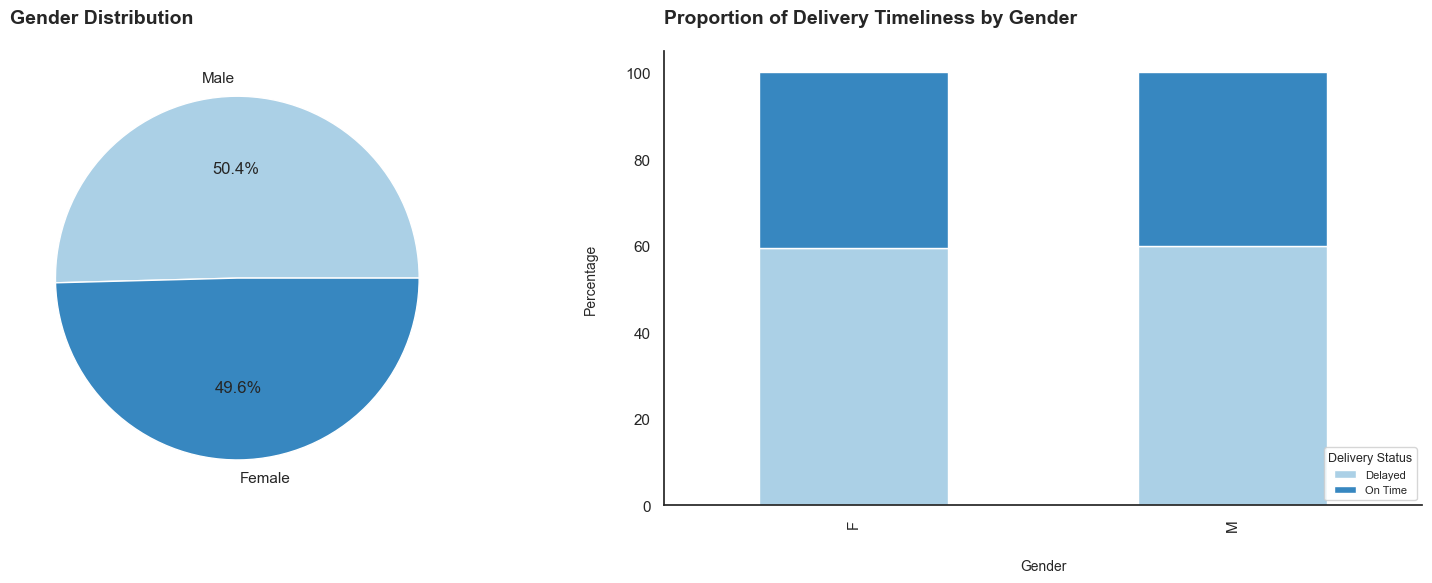

In [275]:
# Use Seaborn "Blues" palette directly
palette_blues2 = sns.color_palette("Blues", n_colors=2) # Adjust based on the required number of colors
palette_blues3 = sns.color_palette("Blues", n_colors=3) # Adjust based on the required number of colors
palette_blues5 = sns.color_palette("Blues", n_colors=5) # Adjust based on the required number of colors

# Demonstrate the palette
# sns.palplot(custom_palette)

# Set Seaborn style and palette
sns.set(style="white")

# Prepare figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Pie-Chart for 'Gender' on the left side using the custom blues palette
df['Gender'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', labels=['Male', 'Female'], colors=palette_blues2)
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create a crosstab between 'Gender' and 'target' for the stacked bar chart
crosstab = pd.crosstab(index=df['Gender'], columns=df['target'], normalize='index') * 100

# Draw the stacked bar chart horizontally on the right side using the custom blues palette
crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=palette_blues2)  # Colors for the bars

# Set labels and title
axes[1].set_title('Proportion of Delivery Timeliness by Gender', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
axes[1].set_xlabel('Gender', fontsize=10, labelpad=20)

# Hide top and right frame lines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Customize legend: make it smaller and position in the bottom right corner
axes[1].legend(title='Delivery Status', labels=['Delayed', 'On Time'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()


The provided data details the proportion of delivery timeliness categorized by gender, with both male and female groups showing a comparable pattern in delays and punctuality. For females, 59.44% of the deliveries were not on time, while 40.56% were on time. Similarly, for males, 59.90% were not on time, and 40.10% were on time.

This small variance in punctuality between genders indicates that delivery performance is nearly identical for both male and female categories. The data reveals that the issue of deliveries not being on time is marginally more pronounced in the male group by about half a percentage point. However, this difference is quite minimal and suggests that gender is not a significant factor in influencing the timeliness of deliveries within this dataset. Overall, the challenge of improving on-time delivery rates is one that appears to be gender-neutral, with both male and female groups experiencing similar rates of delivery delays.

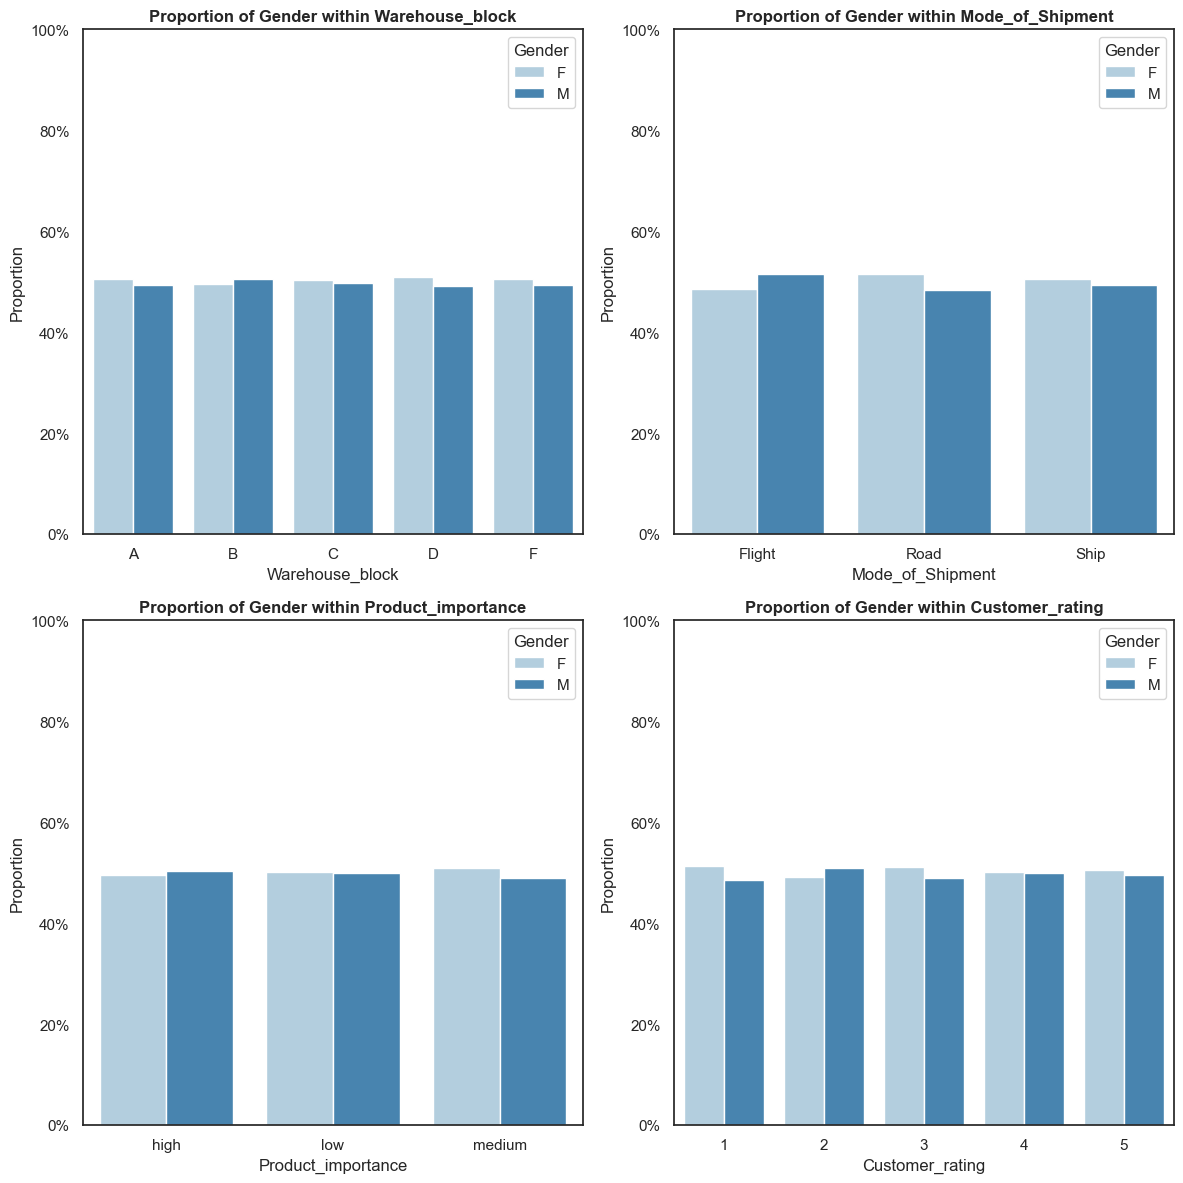

In [276]:
# List of the object columns to plot
object_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Customer_rating']

plot_proportion_by_category(df, object_columns=object_columns, target_column='Gender')


These four bar charts display the gender distribution within different categories of a logistics dataset. It appears that gender distribution is relatively balanced across different warehouse blocks, modes of shipment, product importance levels, and customer ratings. This balance suggests that gender does not significantly influence these aspects of the logistics process, or vice versa, which could be a positive indicator of gender-neutral practices in the logistics decisions or customer engagement represented in the dataset. It's also indicative that gender-based segmentation might not be particularly revealing for these specific variables.

### **LOGISTICS**
#### **Mode of Shipment**

C:\Users\Jens Tauscher\AppData\Local\Temp\ipykernel_17380\814472276.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=data, x=column, order=sorted_ratings, ax=axes[0], palette=palette_blues_r)


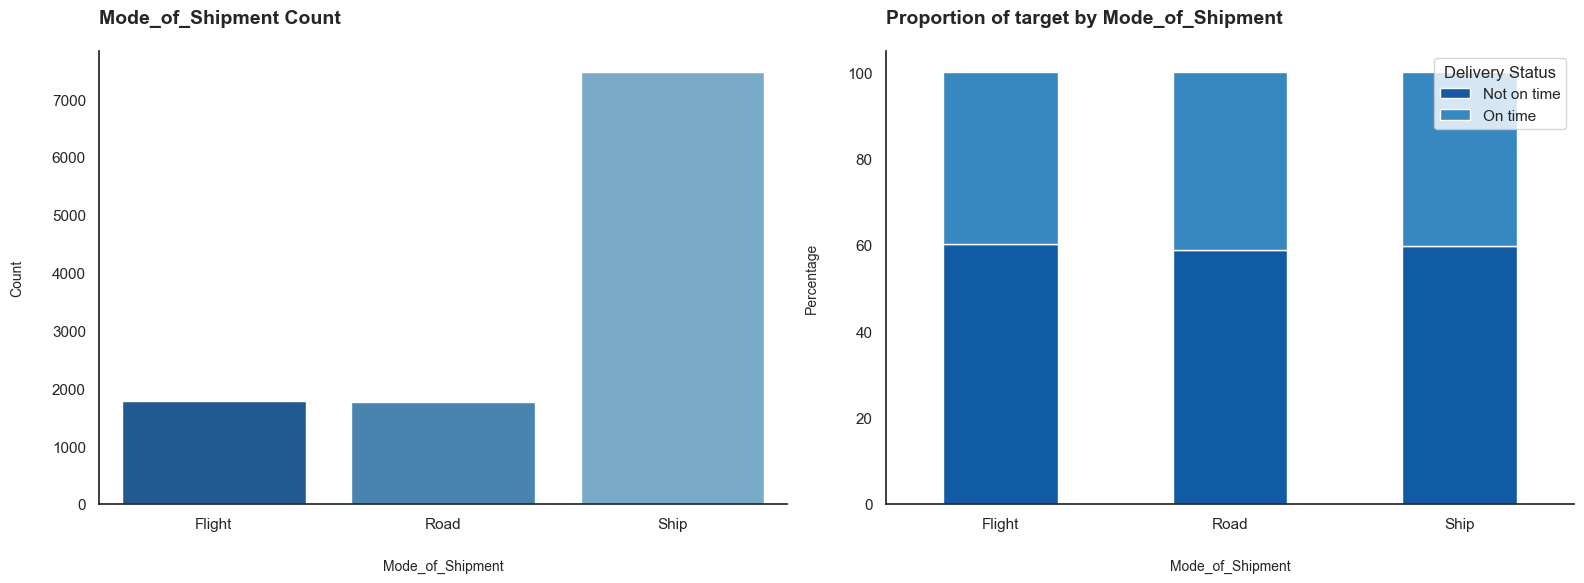

In [277]:

plot_counts_and_proportions(df, 'Mode_of_Shipment', 'target')


The visualized data provides insights into shipment logistics, revealing that 'Ship' is the predominant mode of transport, significantly outpacing 'Flight' and 'Road'. The chart entitled "Proportion of Delivery Timeliness by Shipment Mode" illustrates the delivery punctuality percentages across three different modes of shipment: Flight, Road, and Ship. The data shows that each mode has a relatively similar distribution of punctuality, with approximately 60% of shipments not on time and around 40% on time across all modes. The differences in punctuality rates between the shipping methods are marginal, suggesting a consistent level of performance in terms of delivery timeliness regardless of the mode of transportation used. This uniformity in punctuality proportions might point to overarching factors affecting delivery times that are common to all modes, rather than issues specific to any single method of shipment.

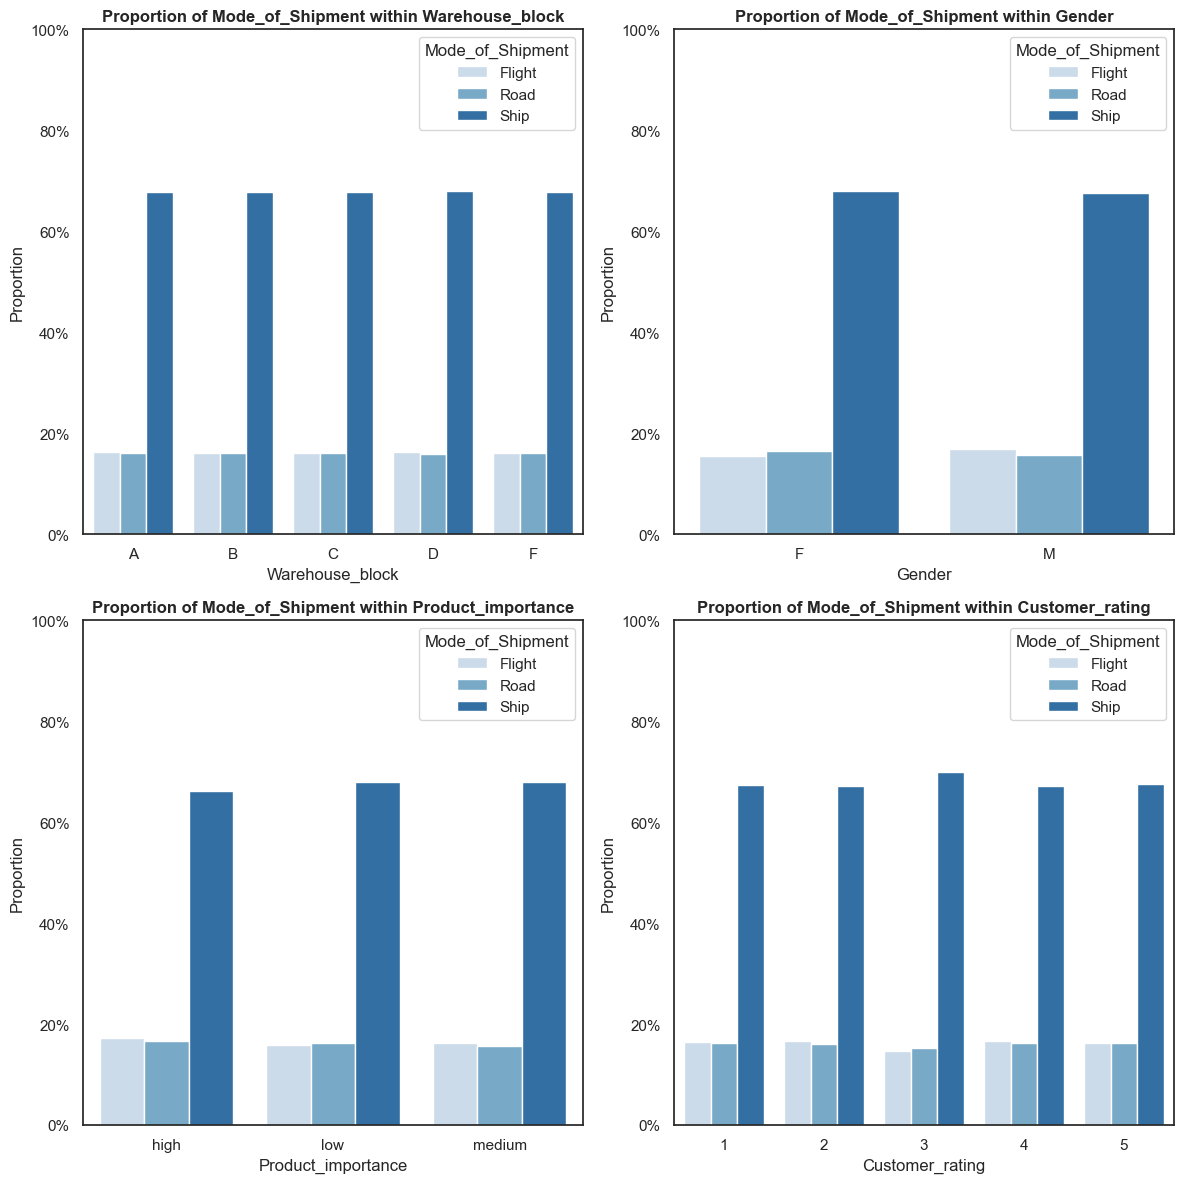

In [278]:
# List of the object columns to plot
object_columns = ['Warehouse_block', 'Gender', 'Product_importance', 'Customer_rating']

plot_proportion_by_category(df, object_columns=object_columns, target_column='Mode_of_Shipment')


#### **Warehouse Block**

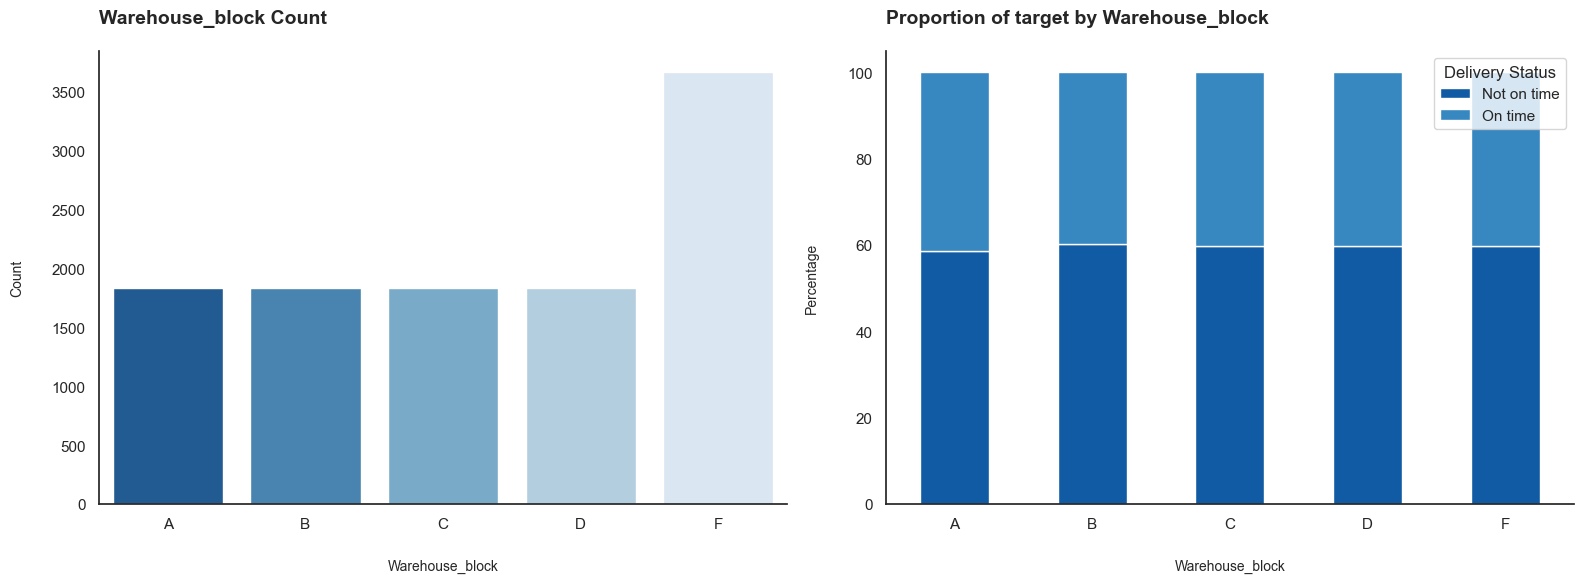

In [279]:
# Example usage:
plot_counts_and_proportions(df, 'Warehouse_block', 'target')


The bar charts provide insights into the distribution and timeliness of deliveries across various warehouse blocks. The first chart illustrates the count of events within each warehouse block, ranging from A to F. Notably, Block F stands out with the highest number of recorded events, indicating it’s the most utilized among the depicted blocks. The other blocks exhibit relatively similar yet lower event counts.

The second chart sheds light on the delivery punctuality from each warehouse block. It reveals a consistent pattern where late deliveries predominate in every block. This uniformity across the blocks may suggest systemic challenges in logistics or operational processes that could benefit from optimization. The visual representation of delivery timeliness proportions clearly indicates areas in need of improvement and could serve as a basis for further investigation or corrective actions, as delivieries from all block show a unpunctuality rate close to 60%.

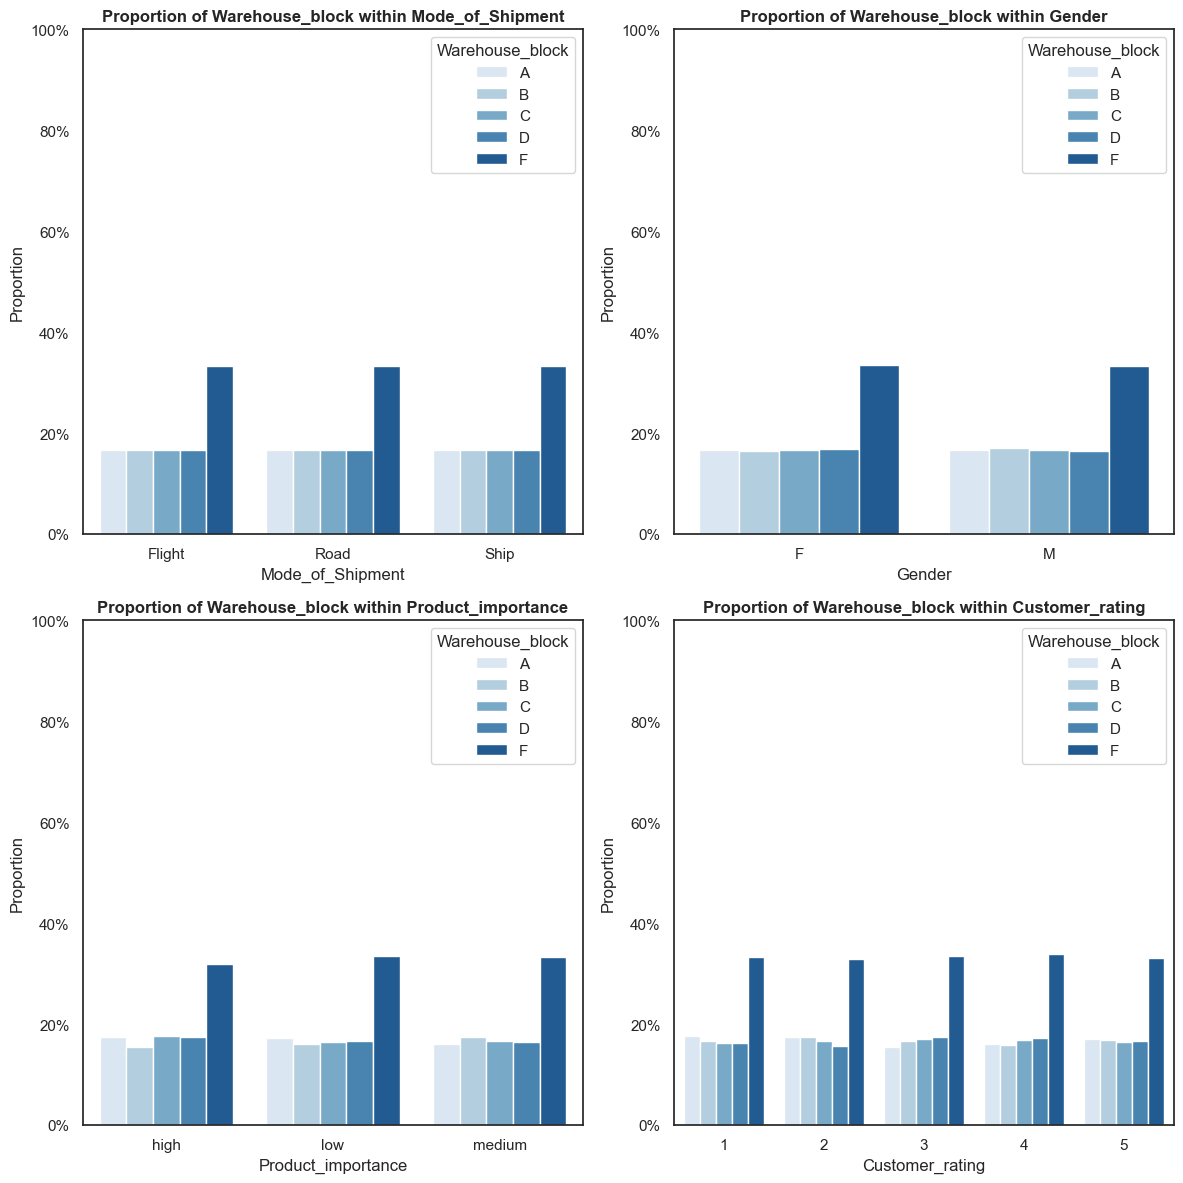

In [280]:
# List of the object columns to plot
object_columns = ['Mode_of_Shipment', 'Gender', 'Product_importance', 'Customer_rating']

plot_proportion_by_category(df, object_columns=object_columns, target_column='Warehouse_block')


#### **Punctuality of Delivery**

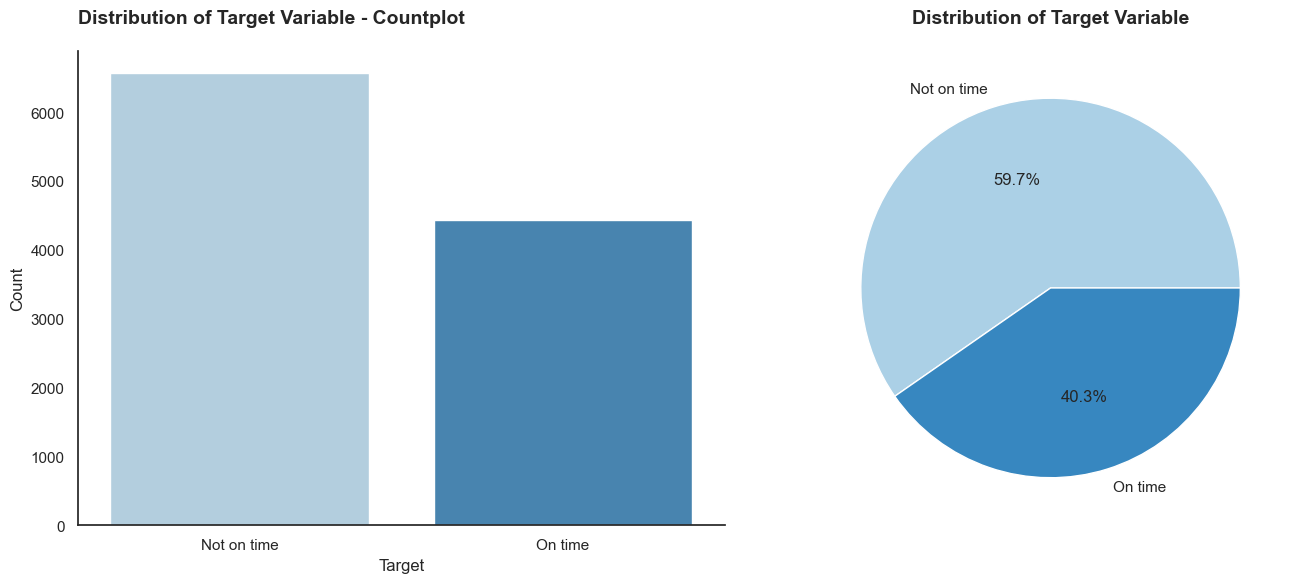

In [281]:
# Set Seaborn style
sns.set(style="white")

# Prepare the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for the 'target' column
sns.countplot(data=df, x='target', ax=axes[0], palette=palette_blues2)
axes[0].set_title('Distribution of Target Variable - Countplot', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Target')
sns.despine(ax=axes[0]) # Removes the top and right border for a cleaner look
# Count the number of different categories in the 'target' column for the pie chart
target_counts = df['target'].value_counts()

# Pie chart for the 'target' column
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=palette_blues2)
axes[1].set_title('Distribution of Target Variable', fontsize=14, pad=20, loc="center", fontweight="bold")

plt.tight_layout() # Adjust layout to avoid overlaps
plt.show()

The countplot presents a significant discrepancy between the categories "Not on time" and "On time," indicating a higher frequency of delays within this dataset. With nearly 60% of events not occurring within the expected timeframe, as reflected in the pie chart, there's a clear prevalence of delays.

This distribution imbalance could potentially affect the training of a classification model, leading to a bias towards the dominant class. During data preparation for modeling, it might be crucial to address this class imbalance to ensure a balanced training set. Techniques such as oversampling or undersampling might be necessary to create a more even distribution of classes, which can contribute to a more accurate and fair model performance.

### **PRODUCT FEATURES**
#### **Product Importance**

C:\Users\Jens Tauscher\AppData\Local\Temp\ipykernel_17380\814472276.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=data, x=column, order=sorted_ratings, ax=axes[0], palette=palette_blues_r)


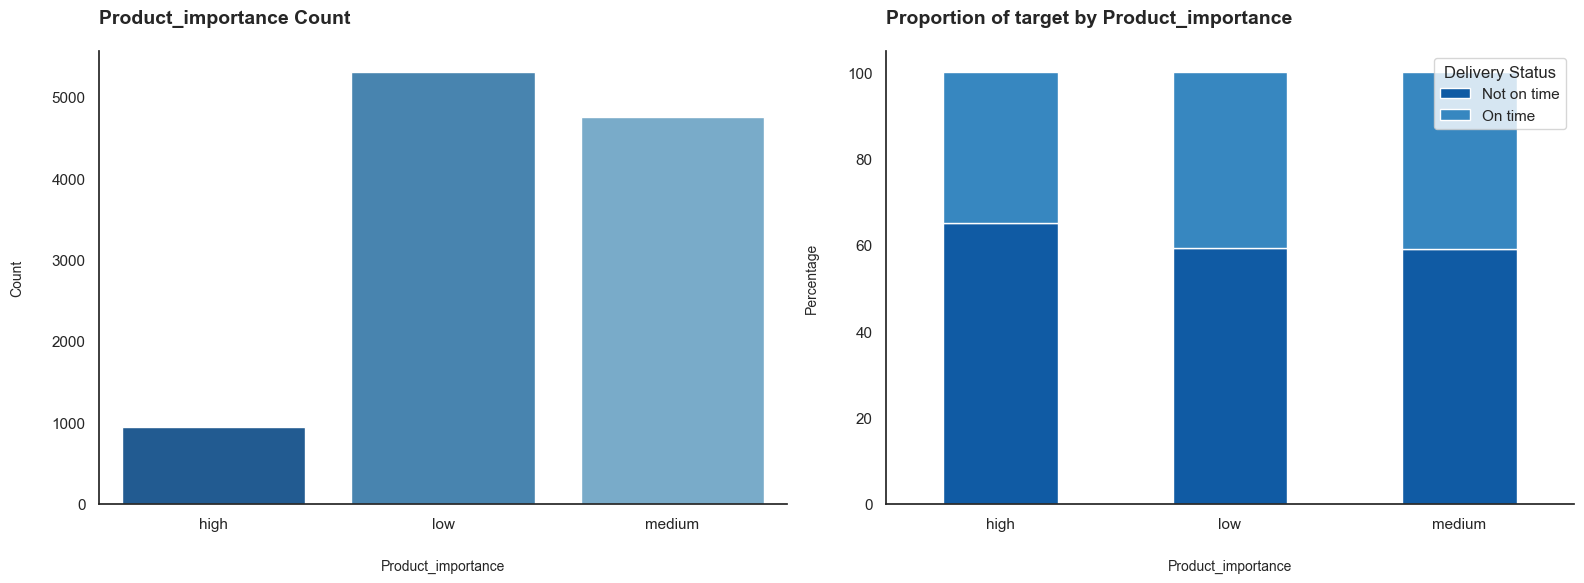

In [282]:
# Plot counts and props
plot_counts_and_proportions(df, 'Product_importance', 'target')


The visualizations above suggest that items labeled with 'low' and 'medium' product importance are more commonly found in the dataset than those labeled as 'high'. The relative frequency of late deliveries seems fairly consistent across different levels of product importance, indicating that the perceived importance of a product does not greatly influence whether it will be delivered on time or not. 

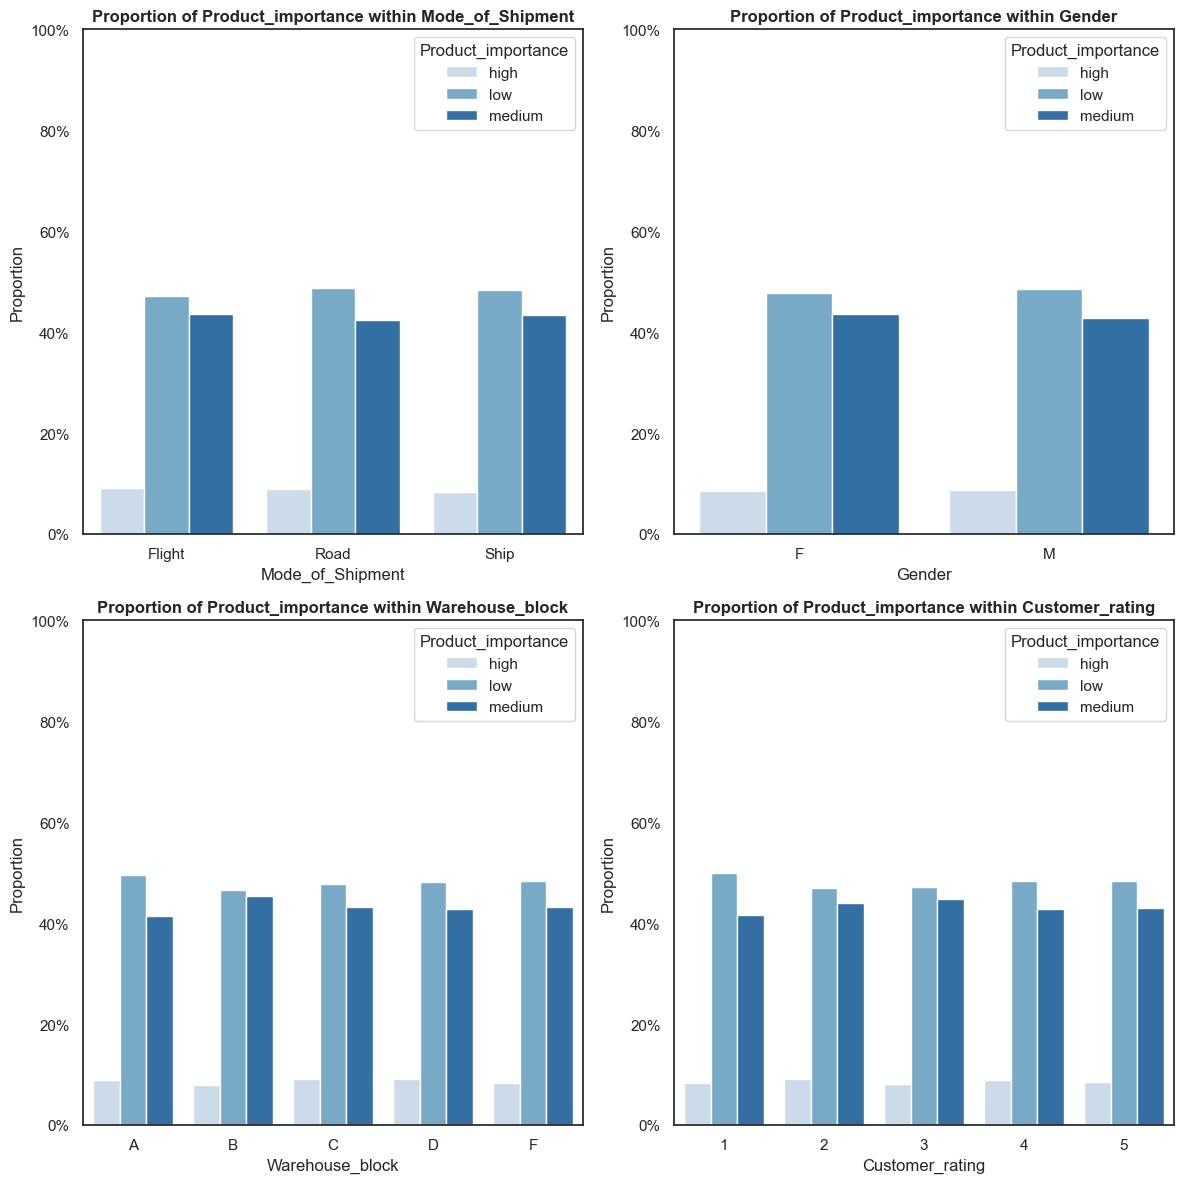

In [283]:
# List of the object columns to plot
object_columns = ['Mode_of_Shipment', 'Gender', "Warehouse_block", "Customer_rating"]

plot_proportion_by_category(df, object_columns=object_columns, target_column='Product_importance')

### **Weight**

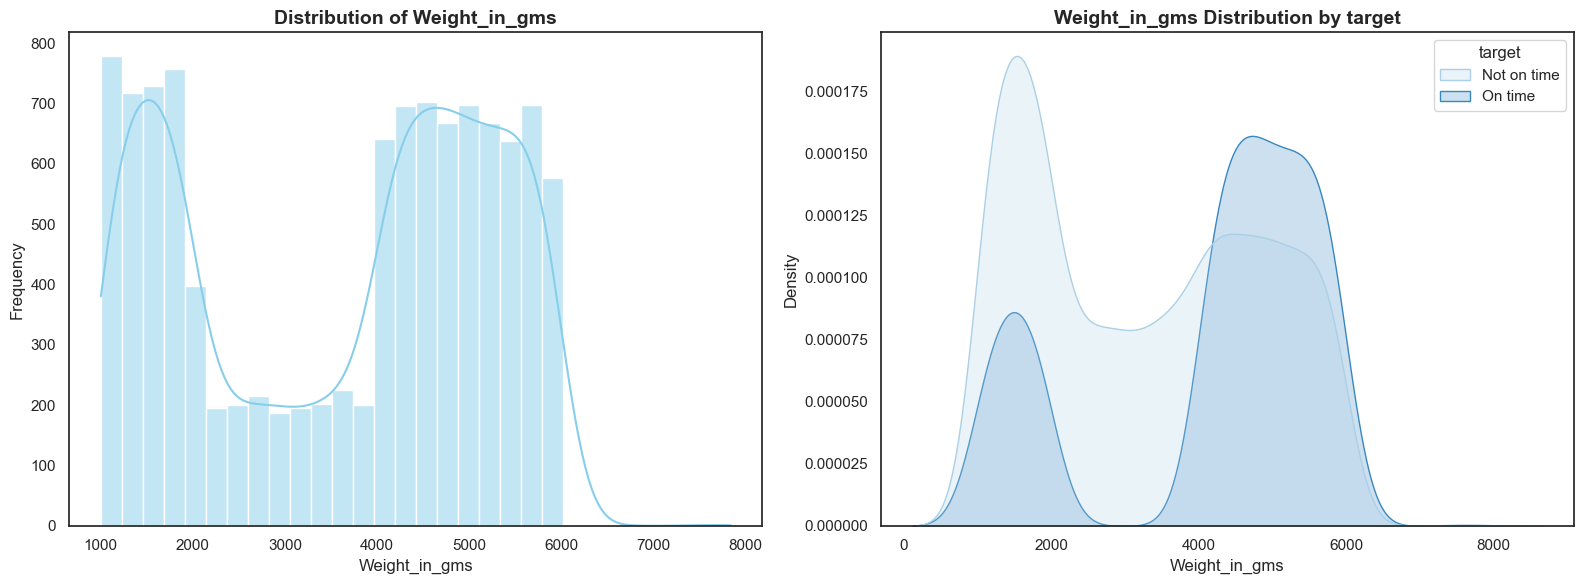

In [284]:
plot_histogram_and_kde(df, 'Weight_in_gms', 'target')

The provided plots seem to show the distribution and density of item weights across on-time and not-on-time delivery categories. From the bimodal distribution in the histogram, we can infer that there are two groups of product weights that are common in the dataset.

From the density plot, we observe two prominent peaks in the distribution of weights. The lighter items, peaking around 2000 grams, have a higher likelihood of not on-time delivery as indicated by the density under the "Not on time" category. Heavier items, especially those from 4000 to 6000 grams, have a significant presence under both on-time and not-on-time deliveries. However, heavier items seem to be less delayed.



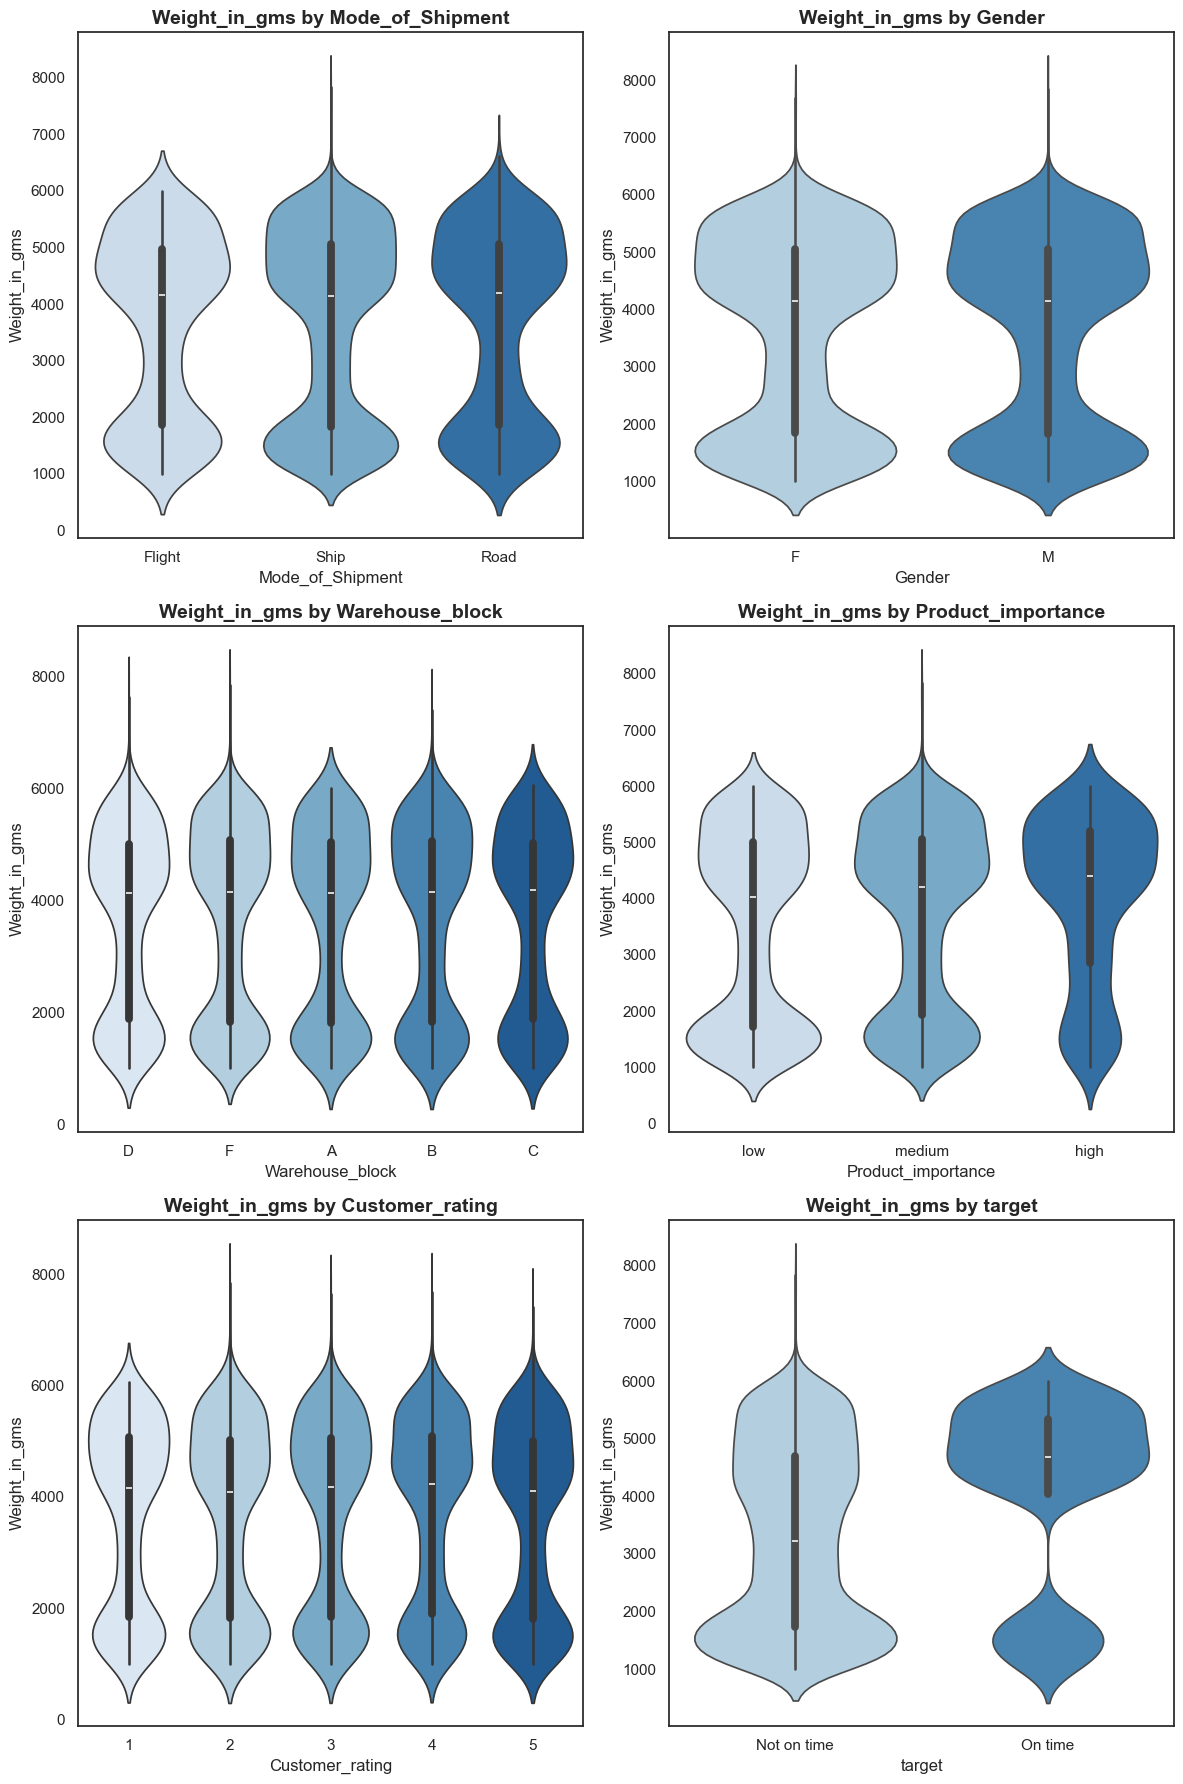

In [285]:
# Show violins
categorical_columns = ['Mode_of_Shipment', 'Gender', 'Warehouse_block', 'Product_importance', 'Customer_rating', 'target']
create_violin_plots(df, 'Weight_in_gms', categorical_columns)

Reviewing the plots, there are no major disparities that stand out across the different categories in relation to the weight of items. However, a slight variation is noticeable:

- *Product Importance:* Items of medium importance seem to have a more varied distribution in weight, suggesting a broader range of products falling under this category.

- *Delivery Timeliness:* There is a slightly wider spread in the weight of items that were not delivered on time, hinting at potential challenges in handling a more diverse set of weights for these deliveries. Most products delivered on time concentrate on a range of weight between 4000 to 6000 gms whereas products delivered delayed offer a more widely range.

These minor observations may merit attention in specific contexts, such as logistics planning or customer service strategies, but overall, the distributions do not show significant differences that would impact the broader analysis or decision-making processes.

#### **Cost of the product**

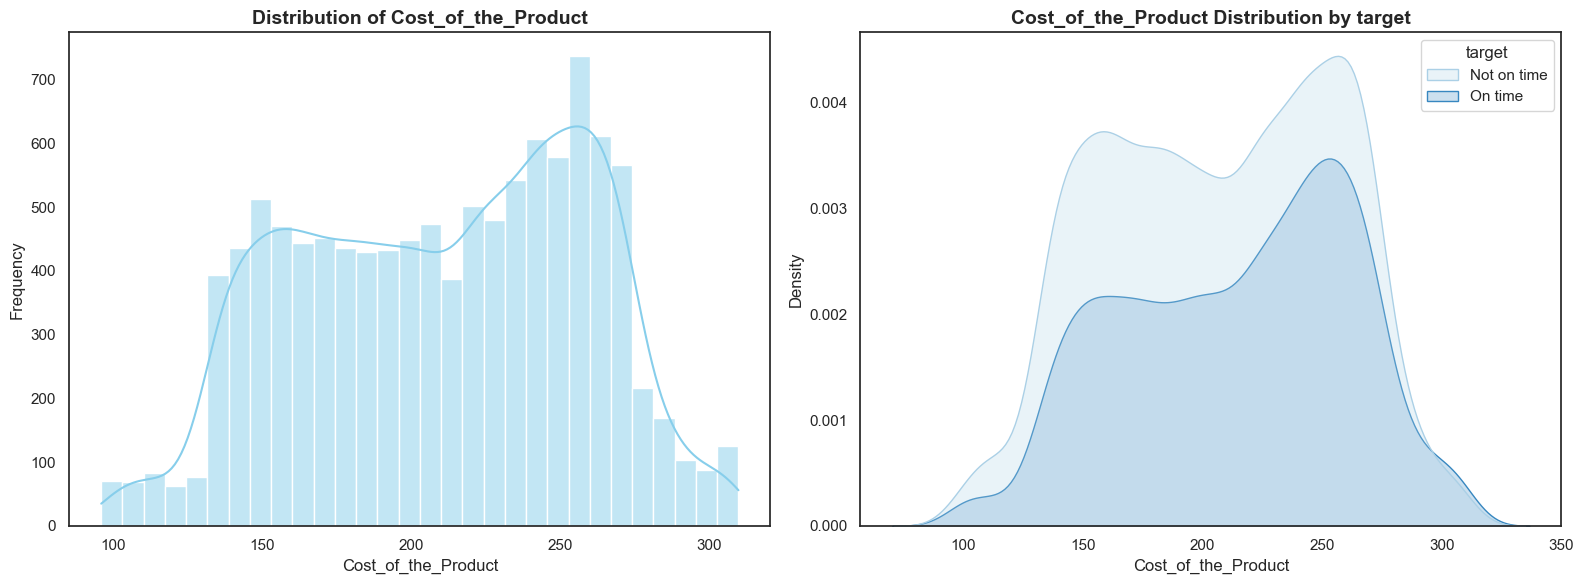

In [286]:
plot_histogram_and_kde(df, 'Cost_of_the_Product', 'target')

Based on the provided plots, the histogram on the left shows the overall distribution of the cost of products, with a clear peak and the majority of products costing between $100 and $250. There are fewer products at the lowest and highest cost ranges.

The similarity in the shape of the density curves for both on-time and not-on-time deliveries suggests that the cost of the product might not be a strong differentiator between the two categories on its own. However, the slight elevation of the curve for not-on-time deliveries around the $250 mark could indicate that items within this cost range are more prone to delivery delays. This observation might warrant a deeper investigation into whether there's a threshold or range of product costs that are more susceptible to delays, or if other factors in conjunction with the cost contribute to the likelihood of a product not arriving on time.

In [287]:
# Show violins
categorical_columns = ['Mode_of_Shipment', 'Gender', 'Warehouse_block', 'Product_importance', 'Customer_rating', 'target']
create_violin_plots(df, 'Cost_of_the_Product', categorical_columns)

In the plots above, there seem to be no major discrepancies that stand out across the different categories when analyzing the cost of the product. The distributions appear consistent, indicating that the cost does not vary significantly with changes in mode of shipment, gender, warehouse block, product importance, customer rating, or delivery timeliness.

Without notable anomalies or patterns, the data suggests that the cost of products remains relatively uniform regardless of these categorical divisions, implying a standard pricing strategy that does not discriminate based on these variables.

### **Customer Features**
#### **Customer Rating**

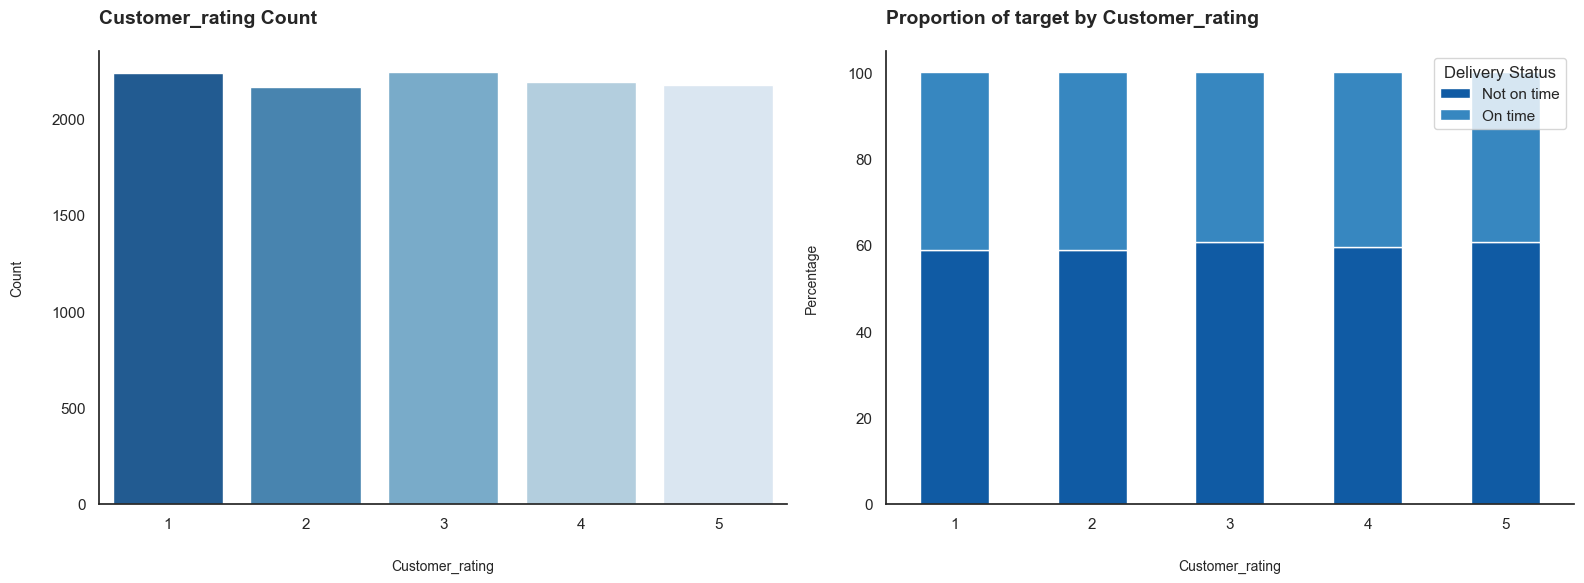

In [288]:
# Plots counts and props
plot_counts_and_proportions(df, 'Customer_rating', 'target')


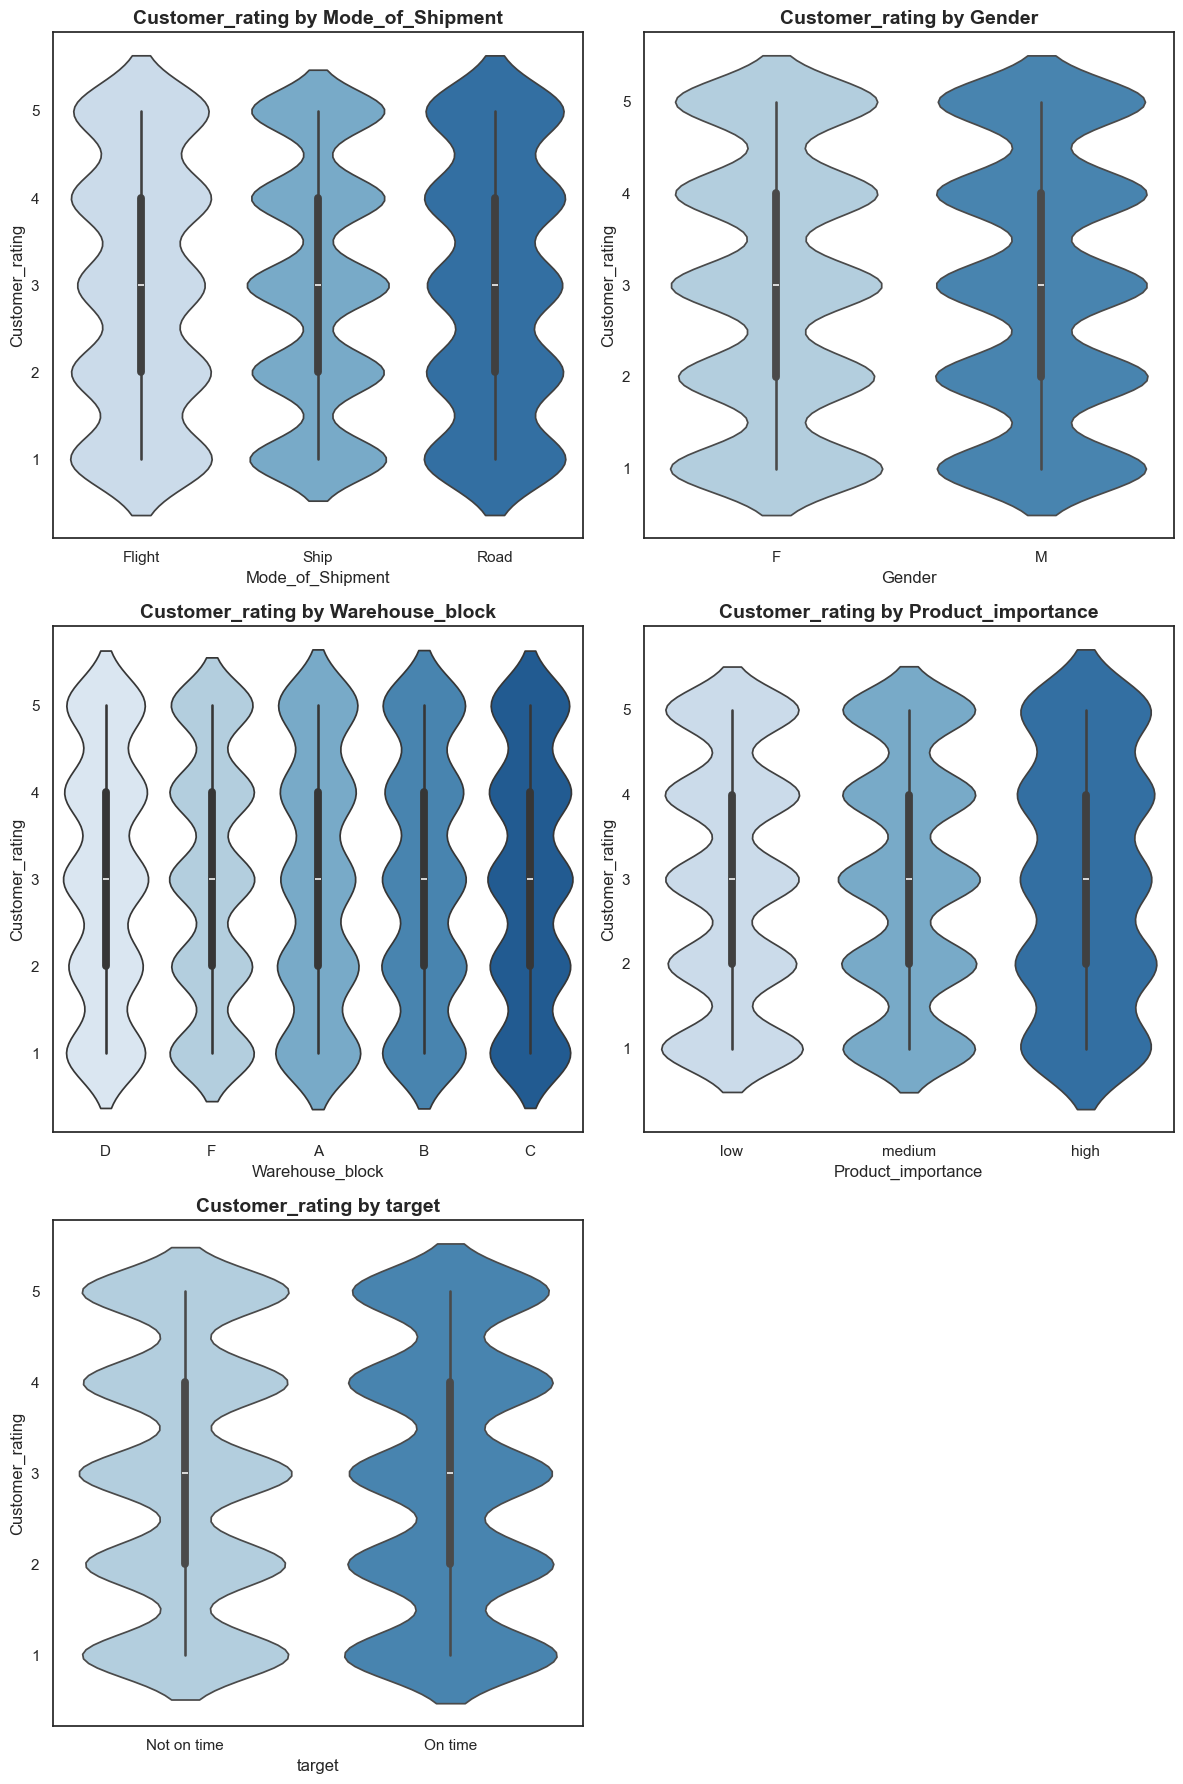

In [289]:
# List of the object columns to plot
categorical_columns = ['Mode_of_Shipment', 'Gender', "Warehouse_block", "Product_importance", "target"]
create_violin_plots(df, 'Customer_rating', categorical_columns)


The violin plots present an overview of customer ratings across various categorical dimensions such as mode of shipment, gender, warehouse block, product importance, and delivery timeliness. In the absence of significant anomalies within the plots, the data suggests a consistent pattern of customer ratings regardless of these categories. No stark asymmetries, notable variances, or outliers suggest any major concerns or irregularities. Overall, the customer ratings appear to be evenly distributed, indicating no immediate need for in-depth analysis or concern across these specific segments. This uniformity suggests that customer satisfaction is relatively stable across different shipment methods, warehouse locations, product importance levels, and delivery times.

#### **Prior Purchases**

C:\Users\Jens Tauscher\AppData\Local\Temp\ipykernel_17380\814472276.py:20: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=column, order=sorted_ratings, ax=axes[0], palette=palette_blues_r)


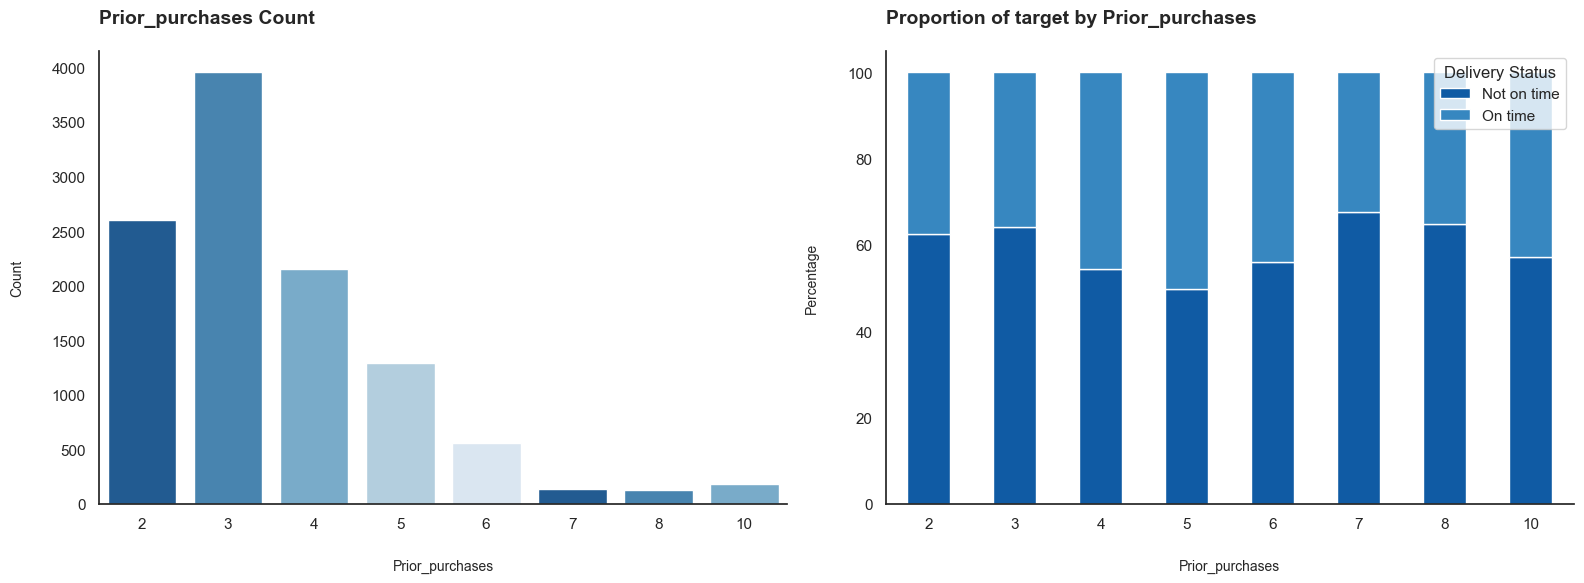

In [290]:
# Plot counts and props
plot_counts_and_proportions(df, 'Prior_purchases', 'target')


These plots present the count and proportion of delivery punctuality with respect to prior purchases. The first graph reveals that the number of prior purchases is mostly between 2 to 5, with a peak at 3 and a noticeable decline afterwards. This indicates that customers often have a moderate number of previous purchases. The second graph displays a fairly consistent proportion of on-time and not on-time deliveries across the different numbers of prior purchases, implying that the likelihood of on-time delivery does not strongly depend on how many purchases a customer has made previously. 

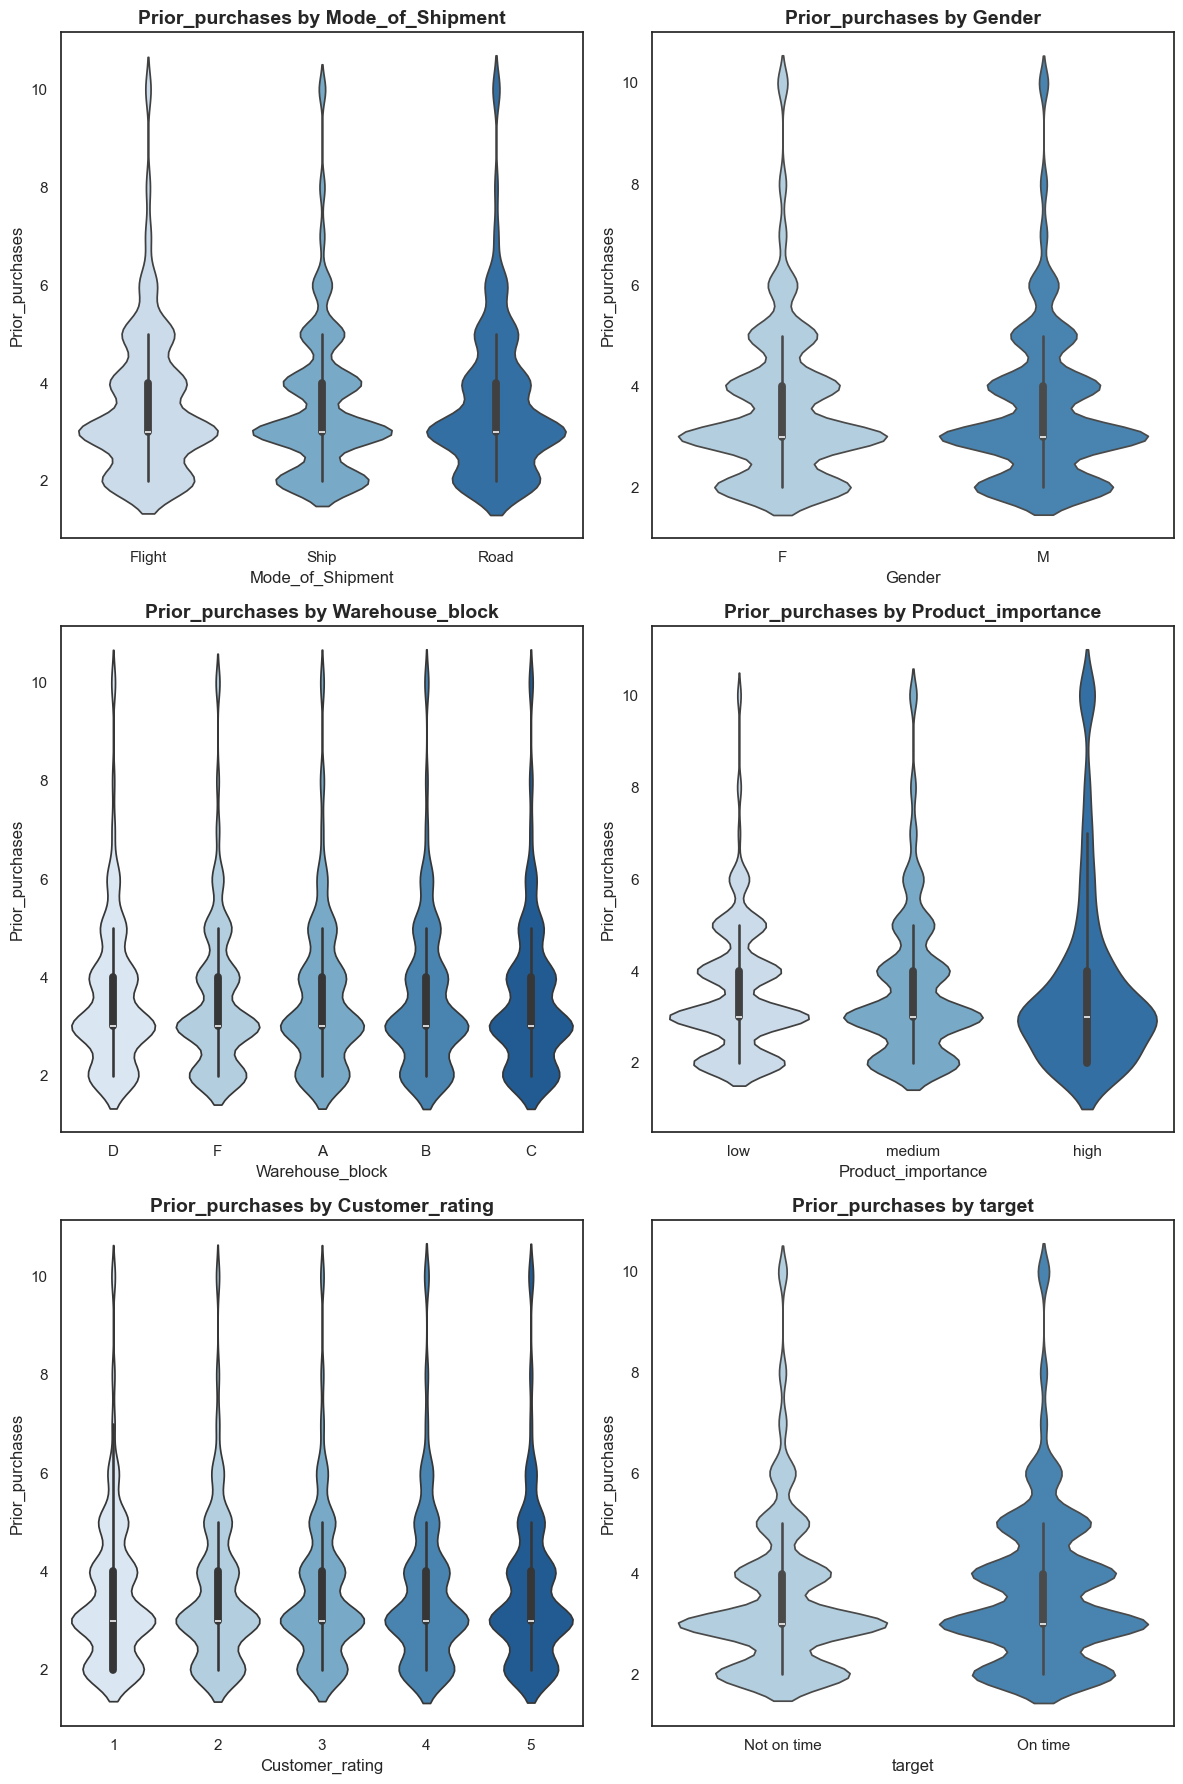

In [291]:
# Show violin plots
categorical_columns = ['Mode_of_Shipment', 'Gender', 'Warehouse_block', 'Product_importance', 'Customer_rating', 'target']
create_violin_plots(df, 'Prior_purchases', categorical_columns)

The set of violin plots illustrates the distribution of previous purchases across various categories such as mode of shipment, gender, warehouse block, product importance, customer rating, and timeliness of delivery. The distributions are symmetrical across gender and customer rating, suggesting no significant gender bias or correlation between the number of previous purchases and customer satisfaction. There is a notable difference in the distribution of prior purchases by product importance, where 'high' importance products tend to have fewer prior purchases. The distribution by delivery timeliness suggests that on-time deliveries have a slightly wider spread in the number of prior purchases compared to late deliveries. This could imply that customers with a history of more purchases are slightly more likely to receive their orders on time. Overall, the plots indicate a general trend where most customers have made a similar number of prior purchases regardless of the shipment mode, warehouse block, or delivery status.

#### **Customer Care Calls**

C:\Users\Jens Tauscher\AppData\Local\Temp\ipykernel_17380\814472276.py:20: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=column, order=sorted_ratings, ax=axes[0], palette=palette_blues_r)


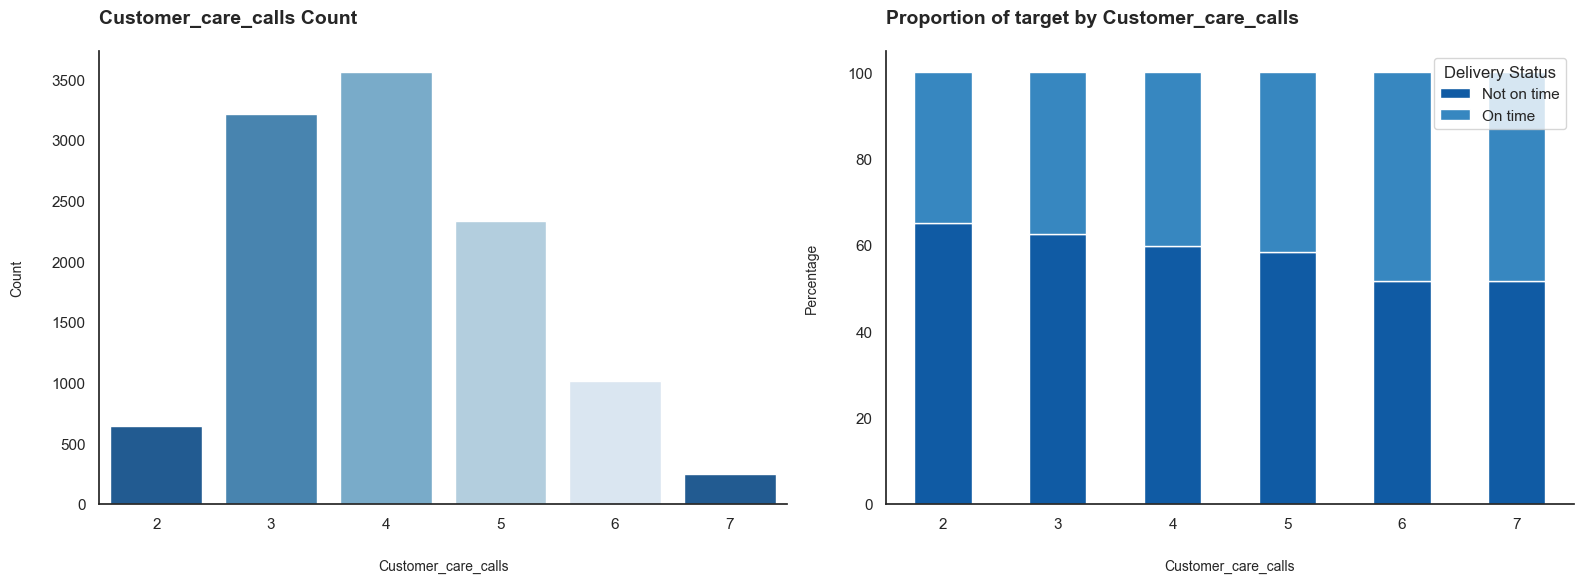

In [292]:
# Plot counts and props
plot_counts_and_proportions(df, 'Customer_care_calls', 'target')


The two plots visualize the count of customer care calls and the proportion of deliveries on time versus not on time per number of customer care calls. The first graph indicates that the number of customer care calls peaks at 4 before gradually declining, with very few cases at 7 calls. This suggests most customers don't frequently need to reach out for support beyond this point. The second plot, which shows delivery timeliness by the number of customer care calls, does not indicate a clear trend that could associate the number of calls with delivery punctuality. The delivery status proportions remain fairly consistent across the number of calls, which suggests that the number of customer care calls may not be a strong indicator of whether a delivery will be on time or not. This could imply that factors other than customer service interactions play a more significant role in delivery punctuality.

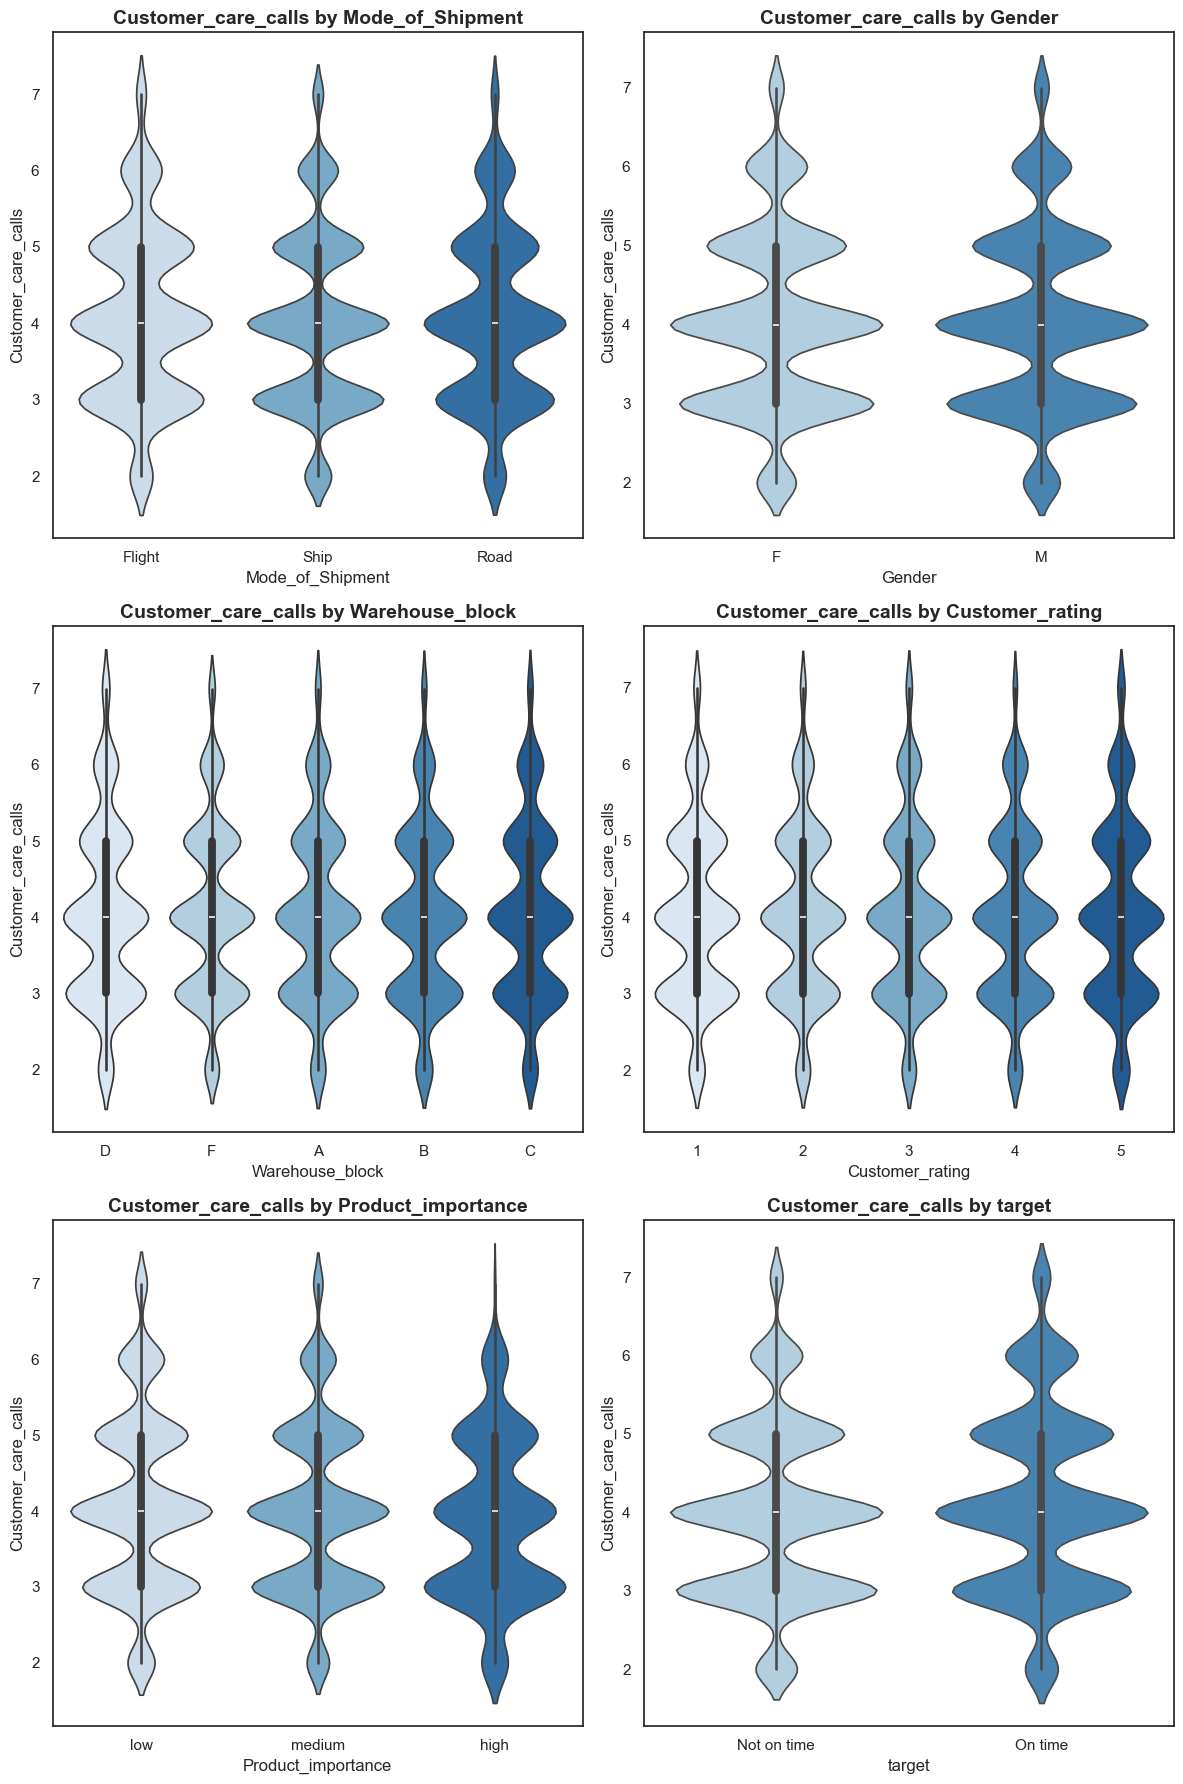

In [293]:
# Usage of the function for 'Weight_in_gms' separated by some categorical columns
categorical_columns = ['Mode_of_Shipment', 'Gender', 'Warehouse_block', 'Customer_rating', 'Product_importance', 'target']
create_violin_plots(df, 'Customer_care_calls', categorical_columns)

These violin plots compare customer care calls across various categories: mode of shipment, gender, warehouse block, customer rating, product importance, and timeliness of delivery.

The plots show a fairly uniform distribution of customer care calls across different modes of shipment and warehouse blocks, suggesting that customer service interaction is consistent regardless of these variables. There's no striking difference in the number of customer care calls when segmented by gender, indicating that customer service interactions are similar for all customers.

Looking at customer ratings, there appears to be a consistent pattern of calls across all rating levels, without significant variation. This suggests that customer satisfaction, as reflected in the ratings, may not be heavily influenced by the number of service calls made.

Regarding product importance, the distribution is slightly varied, but not markedly so, indicating a slight tendency for products of higher importance to involve more customer service interaction.

Finally, when comparing timeliness of delivery, there is no significant difference in the number of customer care calls between on-time and not-on-time deliveries. This indicates that delivery punctuality might not necessarily impact the frequency of customer care interactions.

In summary, the number of customer care calls is quite consistent across the categories shown, without any noticeable trends or outliers that would warrant a deeper analysis.

#### **Discount offered**

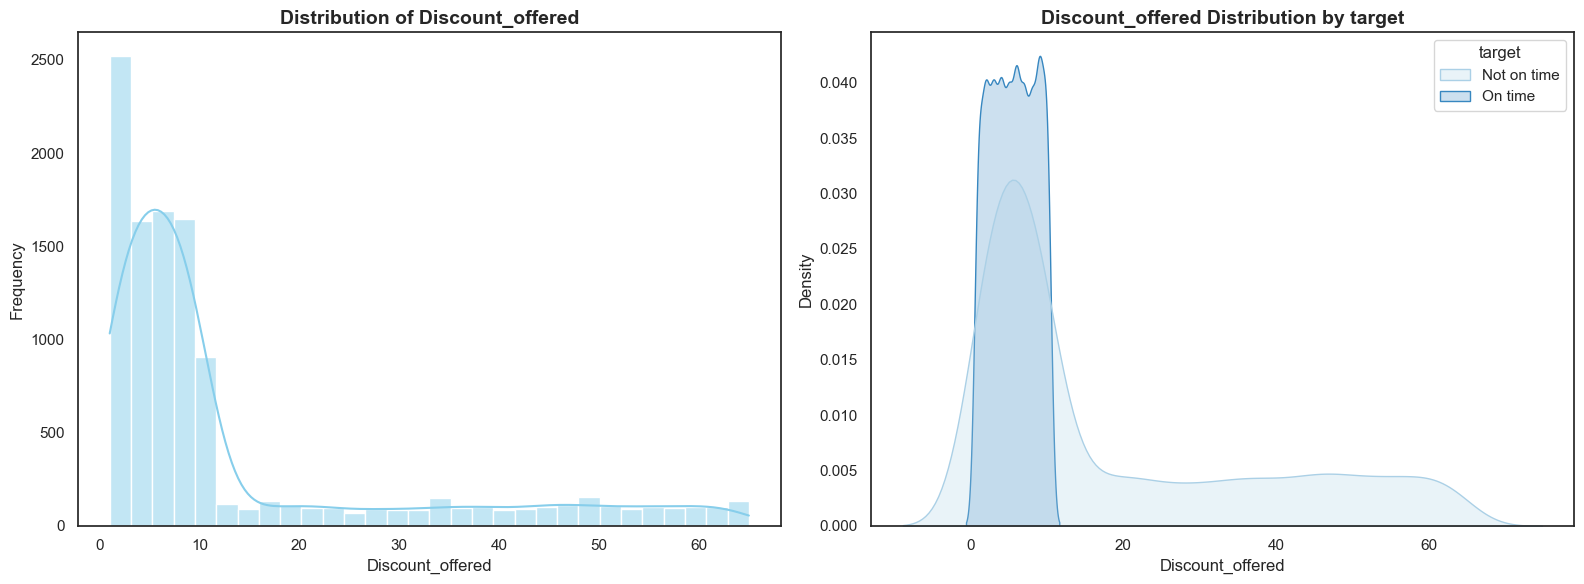

In [294]:
plot_histogram_and_kde(df, 'Discount_offered', 'target')

These two graphics depict the distribution of discounts applied to orders and how this impacts the timeliness of delivery. The histogram on the left side shows a concentration of values near zero with a long tail distribution, suggesting that most orders receive either no discount or a very low one.

The right graph indicates that orders delivered on time predominantly have no or only a minimal discount, while orders that are delayed are often associated with a higher discount. This pattern may suggest that larger discounts are either used as compensation for potential delivery delays or that they are associated with other factors that contribute to delays.

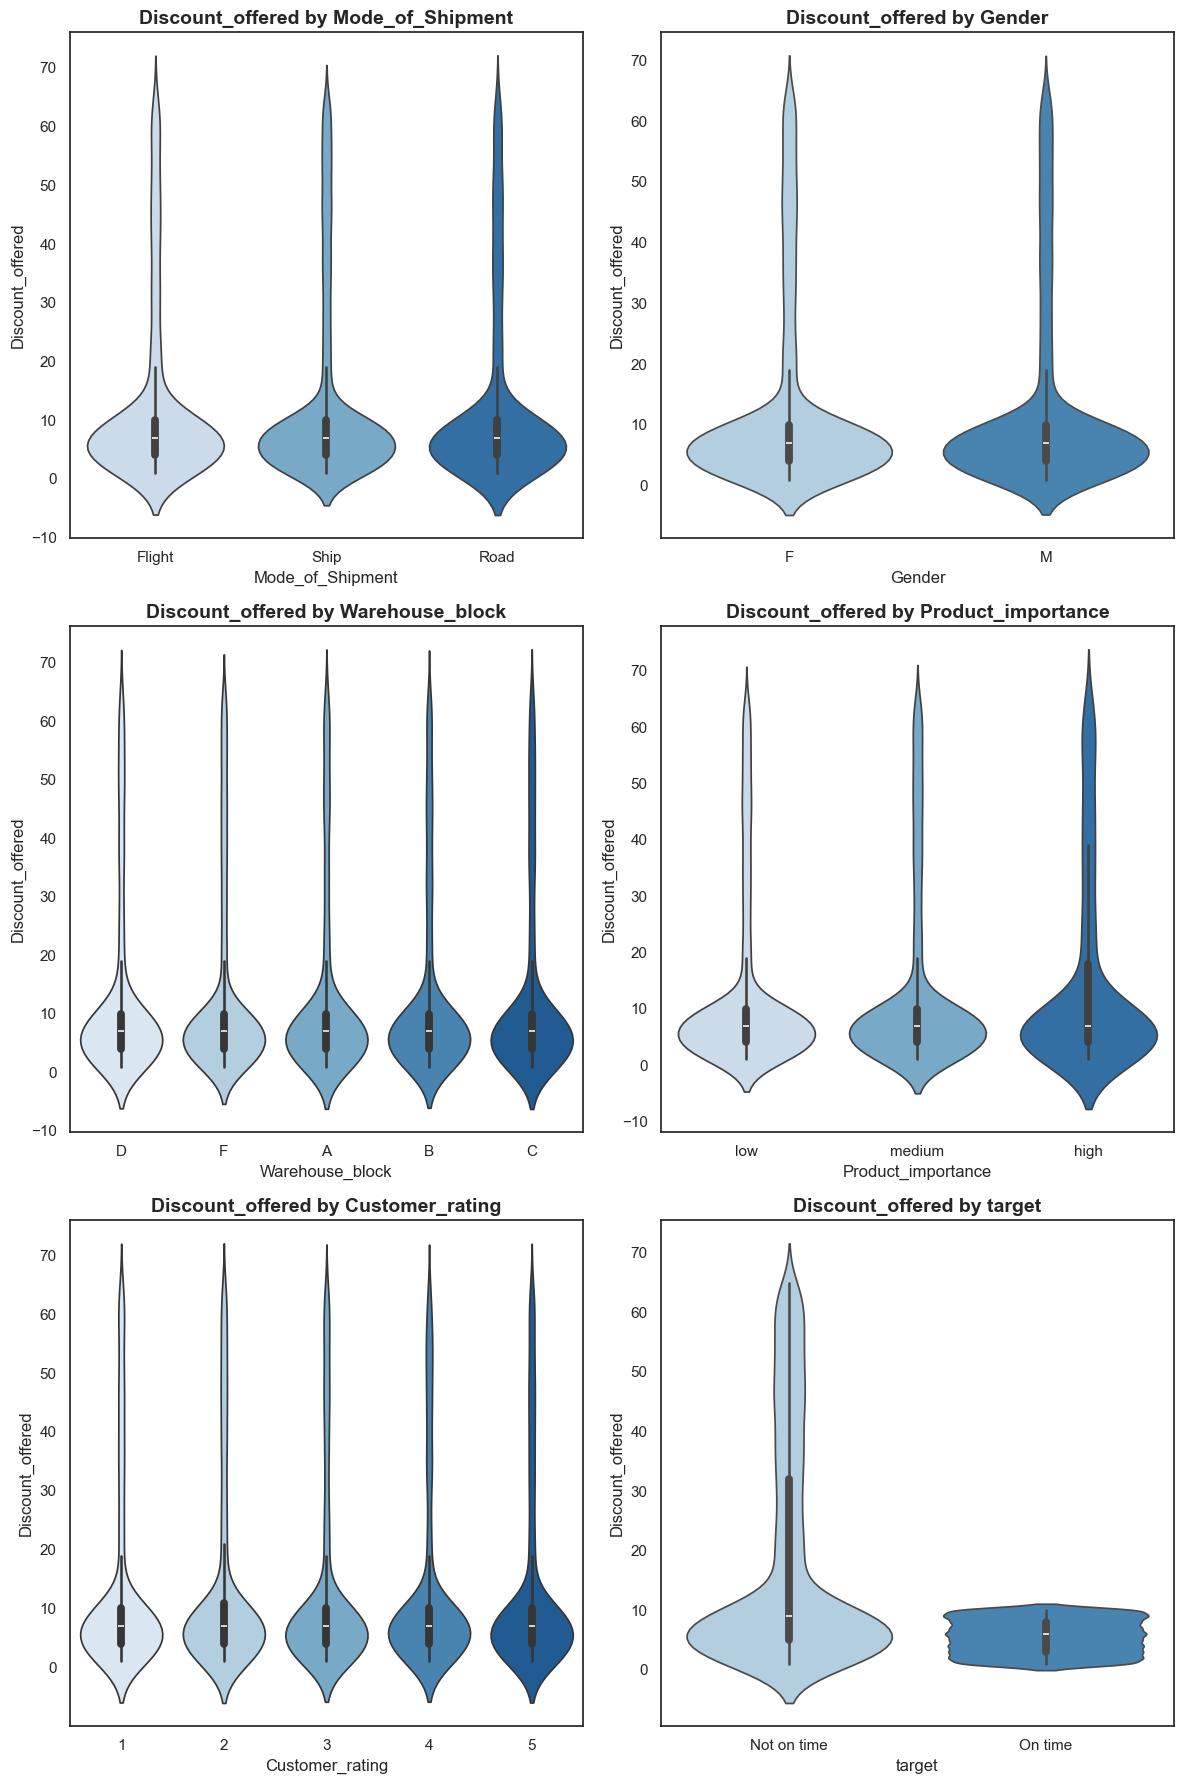

In [295]:
# Example usage of the function for 'Weight_in_gms' separated by some categorical columns
categorical_columns = ['Mode_of_Shipment', 'Gender', 'Warehouse_block', 'Product_importance', 'Customer_rating', 'target']
create_violin_plots(df, 'Discount_offered', categorical_columns)

The violin plots provide insights into the distribution of discounts offered across various categories. Significant variations are mainly evident in the mode of shipment and the timeliness of delivery. Shipments by sea show a wider spread of discounts, indicating variable discount strategies. Notably, there is a relationship between discounts and delivery timeliness: late deliveries coincide with a broader spread of discounts, suggesting that discounts may be used as potential compensation for delivery delays. In other categories like gender, warehouse block, product importance, and customer ratings, no significant differences are observed, suggesting a more uniform approach to discounting across these areas.

### **CORRELATION**

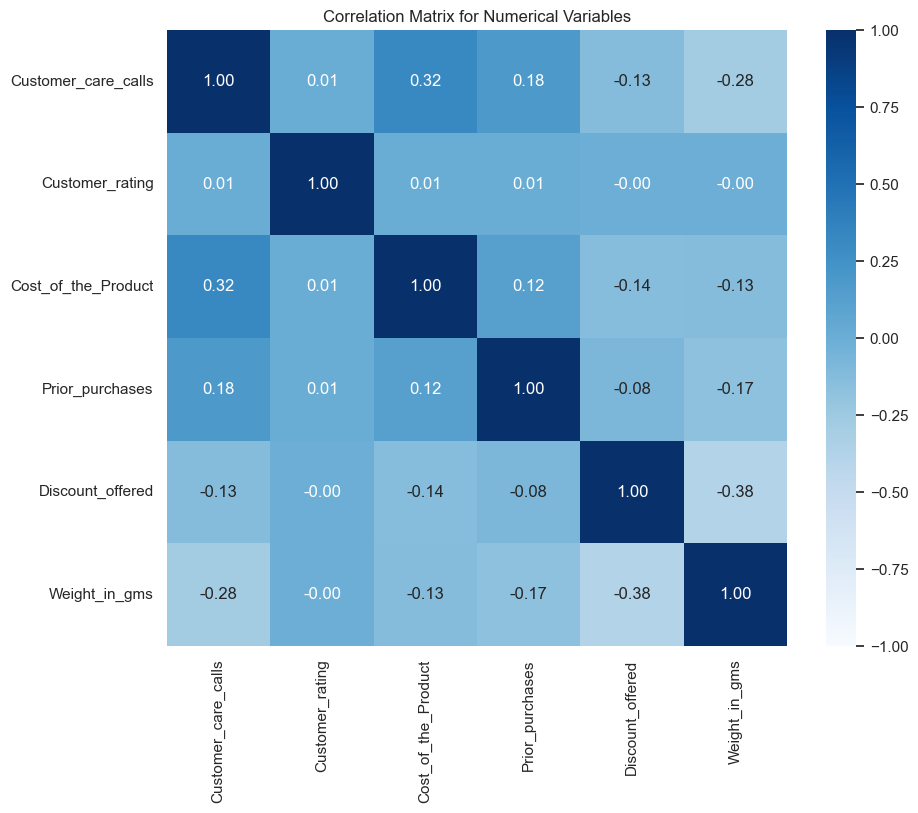

In [296]:
# Select only the numerical columns for correlation matrix calculation
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


The correlation matrix indicates mostly weak linear relationships between the variables in the dataset, with no strong correlations present. Notably, there's a moderate negative correlation between Discount_offered and Weight_in_gms, suggesting that heavier items might receive less discounting. A slight positive correlation is seen between Customer_care_calls with both Cost_of_the_Product and Prior_purchases, which could imply that more expensive items require more customer service. 

The absence of strong correlations means there's likely no need for immediate feature elimination due to multicollinearity, allowing for all features to be considered in model development. This data suggests that models capable of capturing non-linear relationships might perform better, as there are no significant linear correlations to exploit.

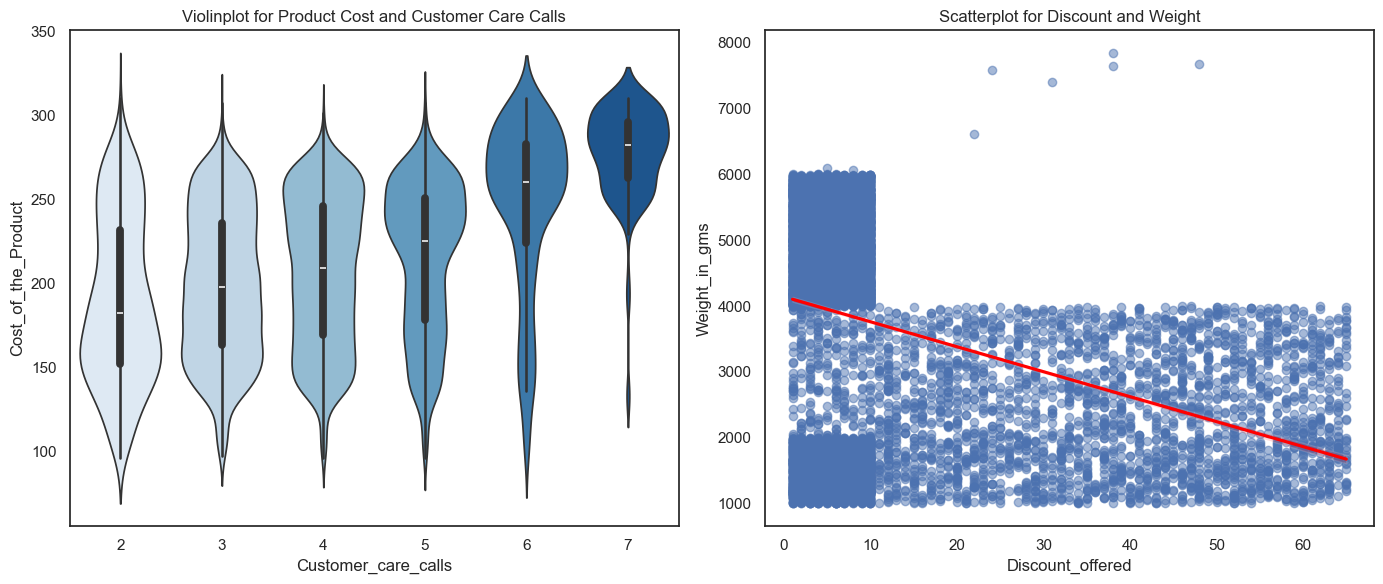

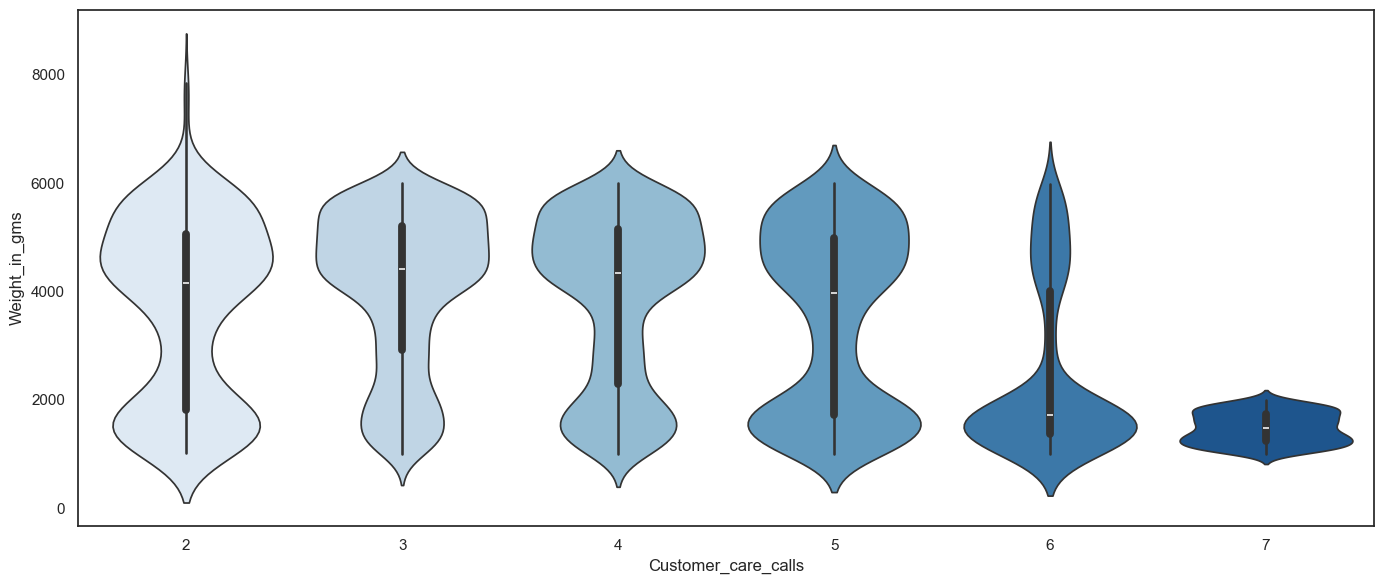

In [297]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df, ax=axes[0], palette="Blues")
axes[0].set_title('Violinplot for Product Cost and Customer Care Calls')

# Scatterplot für "Discount Offered" und "Weight_in_gms"
sns.regplot(x='Discount_offered', y='Weight_in_gms', data=df, ax=axes[1],scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
axes[1].set_title('Scatterplot for Discount and Weight')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

sns.violinplot(x='Customer_care_calls', y='Weight_in_gms', data=df, palette="Blues")

plt.tight_layout()
plt.show()

Analysing the three visuals abvoe, we gain the following insights: 

- *Violin Plot for Product Cost and Customer Calls*: This plot suggests there's not a clear distinction in product cost across the number of customer care calls. Products across various price points seem to necessitate a range of customer service interactions, which may or may not directly influence the timeliness of delivery. However, there's a slight trend indicating more customer care calls with increasing product cost, which could impact delivery if these calls relate to delivery inquiries or issues.

- *Scatter Plot for Discount and Weight*: The negative trend between discount and weight hints that heavier items are less likely to have high discounts. Since heavier items could be logistically more challenging to deliver, the lower discount rate might reflect the higher cost of shipping heavy items, which could indirectly influence delivery performance.

- *Violin Plot for Weight and Customer Care Calls*: The violin plot shows similar weight distributions across various customer care call frequencies, with a trend towards lighter items as calls increase, especially notable at seven calls. Outliers at lower call frequencies indicate heavy items that needed fewer customer interactions, with a general item weight concentration around 2000 to 6000 grams.

## **MODELING**

In our project's modeling phase, I have diligently tested a suite of machine learning models to predict delivery delays, a critical metric affecting customer satisfaction and operational efficiency. The arsenal includes versatile algorithms such as Random Forest, Decision Tree, KNN, XGBoost, Logistic Regression, Gradient Boosting, SVM, and Naive Bayes.

After evaluating these baseline models, I tried to push the boundaries through meticulous hyperparameter tuning to extract the best performance from our leading model. Complementing this, I examined feature importances to pinpoint the key factors contributing to delivery delays.

The culmination of these efforts is a nuanced predictive tool tailored to guide stakeholders in mitigating late deliveries, optimizing the approach to anticipate and address the intricacies of supply chain dynamics.

### **Preprocessing**

To prepare the data for modeling I performed the following steps:

1. Converting the target variable from categorical ('Not on time', 'On time') to numerical format (1, 0).
2. Removing less influential features like 'Mode_of_Shipment', 'Warehouse_block', 'Gender', and 'Customer_rating'.
3. Splitting the data into features and the target variable.
4. Balancing the target classes via oversampling using RandomOverSampler.
5. Dividing the dataset into training and testing sets (80% training, 20% testing).
6. Creating a preprocessing pipeline: scaling numeric features and one-hot encoding categorical features.
7. Applying the preprocessing pipeline to both training and testing data.

In [299]:
# Map target back to numerical
df['target'] = df['target'].map({'Not on time': 1, 'On time': 0})

# Drop features with low importance to simplify the model
df= df.drop(['Mode_of_Shipment', 'Warehouse_block', 'Gender', 'Customer_rating'], axis=1)

# Splitting into Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Initializing the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Applying Over-Sampling to Training Data
X, y = ros.fit_resample(X, y)

# Splitting into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Applying Preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


### **Functions**

Just as I defined multiple functions for conducting exploratory data analysis (EDA), I have similarly established several functions to facilitate the modeling phase of our project. These predefined functions are designed to streamline the evaluation, visualization, and interpretation processes, ensuring a systematic approach to assessing and improving the models. By automating repetitive tasks and providing clear visual outputs, these functions enhance both efficiency and consistency throughout the modeling workflow. This structured methodology not only saves time but also ensures that each model is rigorously evaluated against established metrics, allowing for informed decisions and comparisons across different model iterations.

In [300]:
def plot_feature_importance(model, preprocessor, numeric_features, categorical_features, model_name, palette='Blues_r'):
    """
    Plot the feature importance of a machine learning model.

    Parameters:
    model (estimator): The trained machine learning model.
    preprocessor (ColumnTransformer): Preprocessing pipeline used to transform features.
    numeric_features (list): List of numeric feature names.
    categorical_features (list): List of categorical feature names.
    model_name (str): Name of the model.
    palette (str, optional): Color palette for the plot.

    Returns:
    None
    """

    # Get column names after preprocessing
    numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

    # Display feature importances
    feature_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

    # seaborn Barplot with reversed order and the specified color palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette=palette)
    plt.xlabel('Feature Importance', labelpad=20)
    plt.ylabel('Features', labelpad=20)
    plt.title(f'Feature Importance: {model_name}', fontsize=14, loc='left', fontweight='bold', pad=20)
    plt.show()


In [301]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def print_results(y_true, y_proba, y_pred, model_name, store_metrics=True):
    """
    Function to print evaluation results including metrics, confusion matrix, and classification report.

    Parameters:
        y_true (array-like): True labels.
        y_proba (array-like): Predicted probabilities.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model.
        store_metrics (bool, optional): Whether to store metrics in a DataFrame. Default is True.
    """
    global model_metrics  # Assumes `model_metrics` is defined somewhere globally

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_proba)  # Utilizing probabilities for calculation

    # Create or update metrics in DataFrame
    metrics = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
    if store_metrics:
        if model_name in model_metrics['Model'].values:
            model_metrics.loc[model_metrics['Model'] == model_name, list(metrics.keys())] = list(metrics.values())
        else:
            new_row = {'Model': model_name, **metrics}
            model_metrics = pd.concat([model_metrics, pd.DataFrame([new_row])], ignore_index=True)

    # Visualize Confusion Matrix and Classification Report side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix for {model_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Classification Report
    report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).iloc[:-1, :].T
    sns.heatmap(report, annot=True, cmap='Blues', cbar=False, fmt='.2f', ax=axes[1])
    axes[1].set_title(f'Classification Report for {model_name}')
    axes[1].set_xlabel('Metrics')
    axes[1].set_ylabel('Classes')
    
    plt.show()

In [304]:
def plot_model_performance(model, X_train, y_train, X_test, y_test, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plot the learning curve and receiver operating characteristic (ROC) curve of a machine learning model.

    Parameters:
    model (estimator): The trained machine learning model.
    X_train (array-like): Training data features.
    y_train (array-like): Training data target.
    X_test (array-like): Testing data features.
    y_test (array-like): Testing data target.
    cv (int or cross-validation generator, optional): Determines the cross-validation splitting strategy.
    train_sizes (array-like, optional): Proportions of the training set to include in the learning curve.

    Returns:
    None
    """

    sns.set(style="white", palette="Blues", color_codes=True)

    # Calculate probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate FPR, TPR, and thresholds for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Calculate the AUC value
    roc_auc = auc(fpr, tpr)

    # Calculate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)

    # Calculate training and testing scores for the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve and ROC curve side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Learning curve
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    ax1.hlines(test_accuracy, train_sizes[0], train_sizes[-1], colors='g', label='Test score', linestyles='dashed')

    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Learning Curve", fontweight="bold", fontsize=16, pad=20)
    ax1.legend(loc="best")
    sns.despine(ax=ax1)

    # ROC curve
    ax2.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random classification (AUC = 0.50)')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC)', fontweight="bold", fontsize=16, pad=20)
    ax2.legend(loc="lower right")
    sns.despine(ax=ax2)

    plt.show()


### **Random Forest**

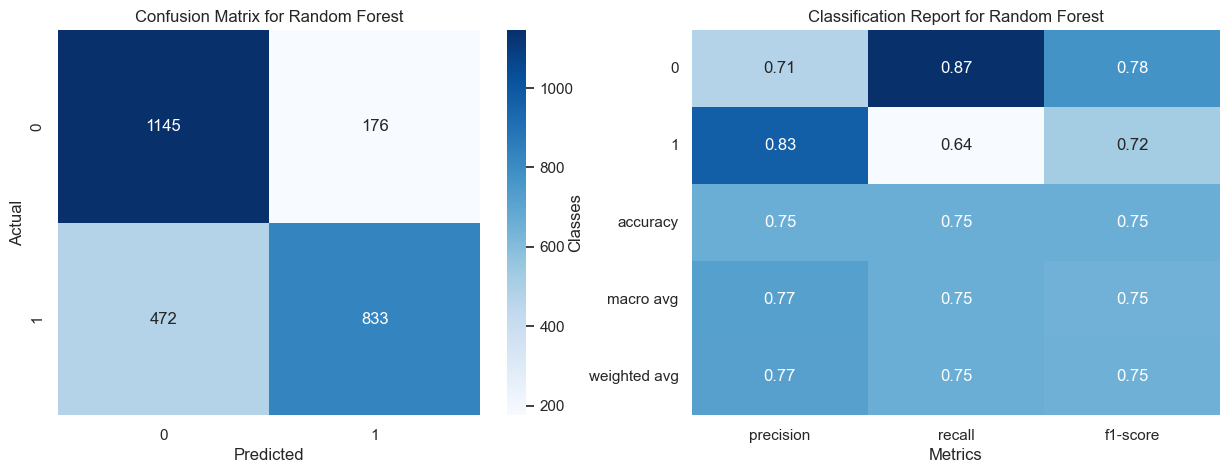

In [307]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model and storing the metrics
rf_model.fit(X_train, y_train)

# Predicting the target values for the test data
y_pred = rf_model.predict(X_test)

# Calculating the probabilities for the positive class
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Define an empty DataFrame to store model metrics
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Applying the function and storing the metrics
print_results(y_test, y_proba, y_pred, 'Random Forest', store_metrics=True)


Based on the confusion matrix and classification report for the Random Forest model, we can summarize the model’s performance as follows:

- The model is better at predicting on-time deliveries than delays, with a higher precision for the non-delayed class.
- However, there's a significant number of false negatives, indicating that the model misses quite a few delayed deliveries.
- The accuracy stands around 75%, which is decent, but there’s room for improvement, especially considering the recall for the delayed class (1) is only at 62%.
- The F1-scores suggest a balance between precision and recall for both classes, with slightly better performance for the non-delayed class.

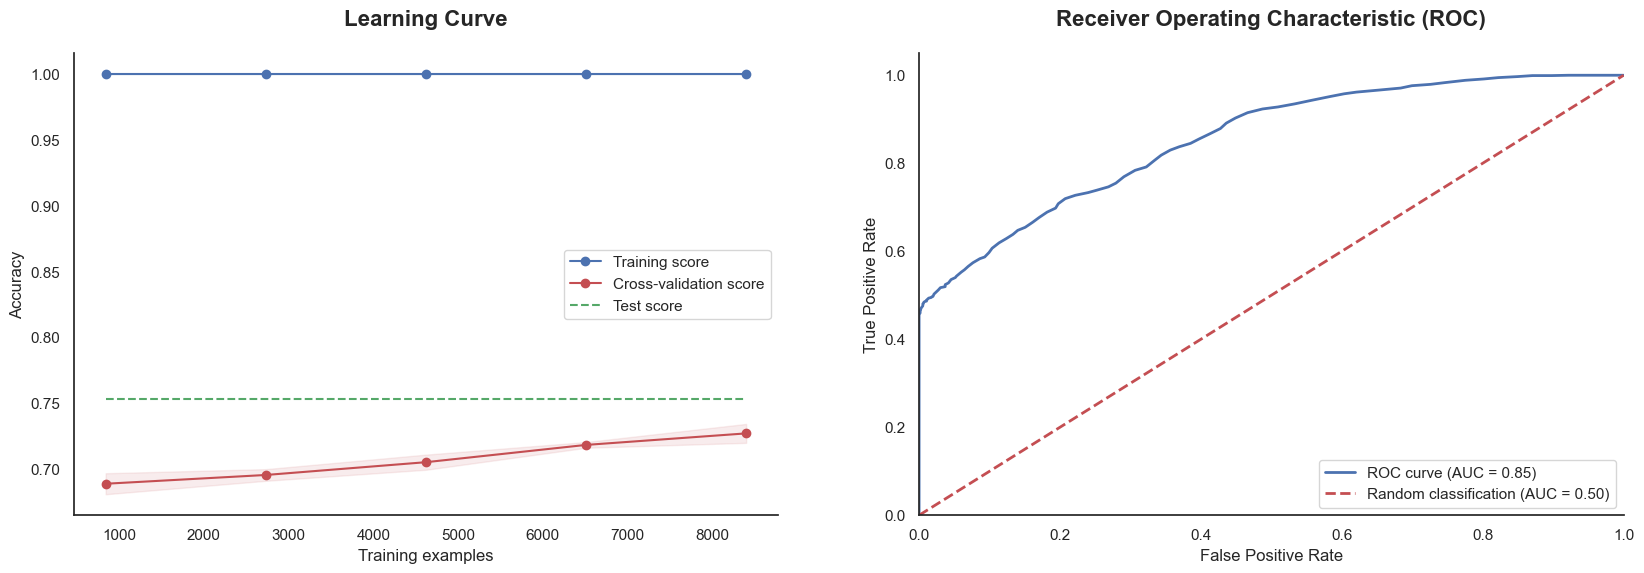

In [308]:
# Plot model performance
plot_model_performance(rf_model, X_train, y_train, X_test, y_test, cv=5)

- **Learning Curve**: From the learning curve, we can see that the model's training accuracy is quite high and remains stable with more data, while the cross-validation score is noticeably lower. This discrepancy suggests that the model may be overfitting to the training data. The test score, indicated by the dashed line, is even lower, which confirms that the model is not generalizing as well as it could.

- The **Receiver Operating Characteristic (ROC) curve**, with an Area Under the Curve (AUC) of 0.86, suggests that the model has a good ability to distinguish between the two classes (on-time and delayed deliveries). An AUC of 0.86 means the model is quite capable of distinguishing between the positive and negative classes, and is significantly better than random guessing (AUC = 0.50). The ROC curve should ideally be close to the top-left corner; our model seems to be performing well, but there might be room for improvement, especially in terms of reducing overfitting as suggested by the learning curve.

In summary, while the ROC curve indicates strong predictive capabilities, the Learning Curve suggests that the model may be too complex for the amount of data or not properly regularized, causing it to overfit. Adjusting the model complexity or adding more data, if possible, could help improve the model’s generalization.

### **Decision Tree**


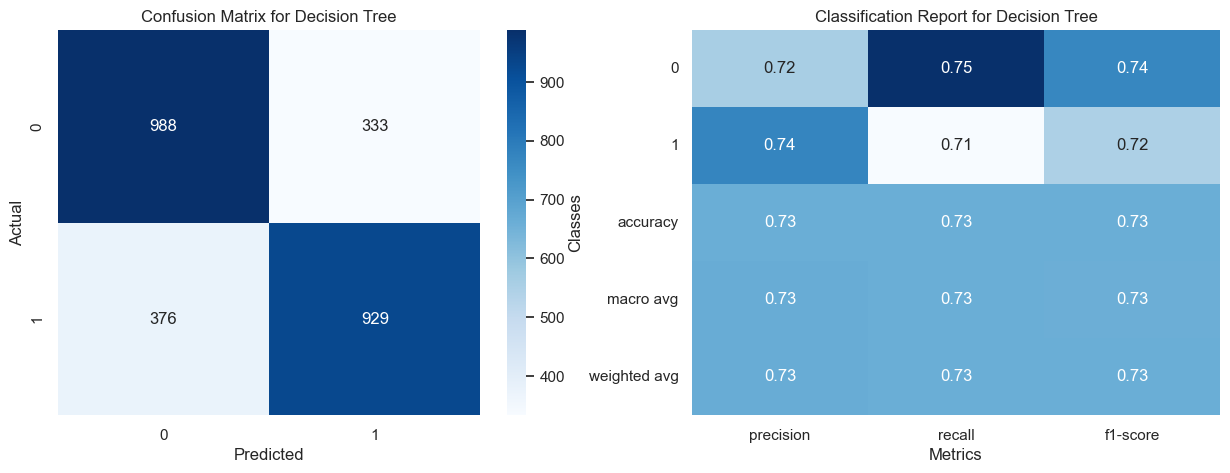

In [309]:
# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model and storing the metrics
dt_model.fit(X_train, y_train)

# Calculating the probabilities for the positive class
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Predicting the target values for the test data
y_pred_dt = dt_model.predict(X_test)

# Applying the function and storing the metrics
print_results(y_test, y_proba, y_pred_dt, 'Decision Tree', store_metrics=True)



The provided visuals for the Decision Tree model show the following:

- **Confusion Matrix:** The confusion matrix indicates that the model is better at correctly predicting late deliveries (944 true positives) compared to the Random Forest model previously discussed. However, it also makes more false positive errors (294), predicting deliveries as late when they are actually on time.

- **Classification Report:** The classification report reflects a balanced performance between the classes, with an accuracy of 75%. Precision and recall are relatively symmetrical across the two classes, and the F1-scores are consistent at 0.74 and 0.76, which indicates a harmonious balance of precision and recall.

In summary, the Decision Tree model seems to provide a more balanced prediction for both classes compared to the previous Random Forest model. It has improved recall for predicting delays but at the cost of more false positives.

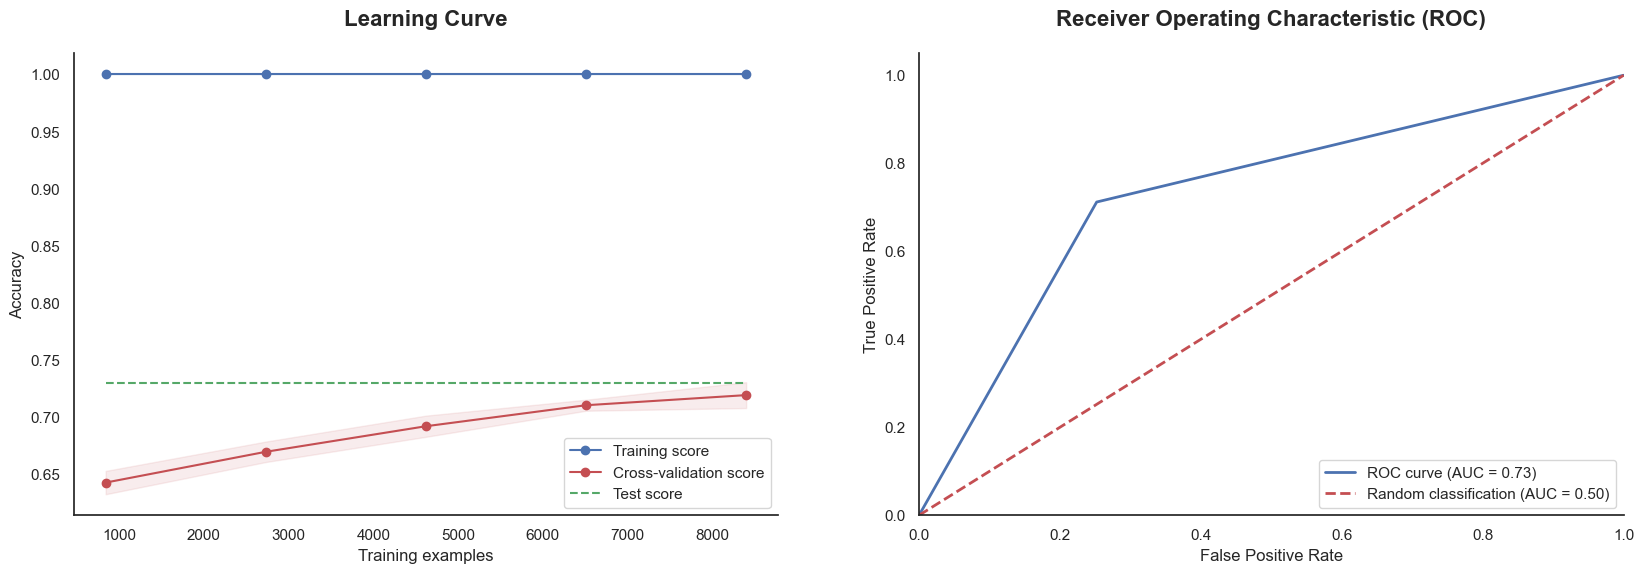

In [310]:
# Plot model performance
plot_model_performance(dt_model, X_train, y_train, X_test, y_test, cv=5)

- The **learning curve** does show the cross-validation score increasing as more training examples are used, which suggests the model is benefiting from more data and improving. However, the gap between the training and cross-validation scores indicates there could still be some overfitting, as the model performs better on the training data than on the cross-validation data.

- The **ROC curve** shows an AUC of 0.75, which is decent but leaves room for improvement, especially compared to the previous model, which had an AUC of 0.86. This model seems to be more generalizable, though, given the upward trend in cross-validation accuracy as the training data increases.

### **K-Nearest Neigbhours (KNN)**

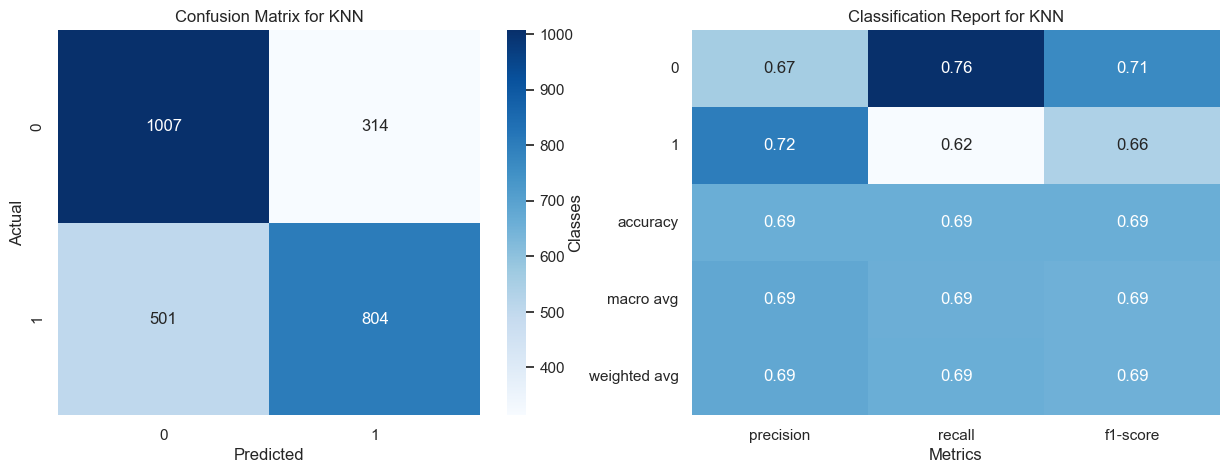

In [311]:
# Initializing and training a basic K-Nearest Neighbors (KNN) classifier
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train, y_train)

# Calculating the probabilities for the positive class
y_proba = knn_basic.predict_proba(X_test)[:, 1]

# Predicting the target values for the test data
y_pred_knn_basic = knn_basic.predict(X_test)

# Printing the evaluation results for the basic KNN model
print_results(y_test, y_proba, y_pred_knn_basic, 'KNN')


The confusion matrix and classification report for the KNN (k-nearest neighbors) model show the following insights:

- The model is more effective at identifying delayed deliveries than on-time ones, indicated by a higher true positive rate.
- However, the model also misclassifies a notable number of on-time deliveries as delayed (false positives).
- Precision is relatively balanced between the two classes, but the recall is significantly lower for delayed deliveries, suggesting that the model misses several actual delays.
- The overall accuracy is 69%, and the F1-score, which balances precision and recall, is slightly better for the on-time class.
- These metrics indicate the model performs moderately well but could benefit from further tuning to improve recall for delayed deliveries.

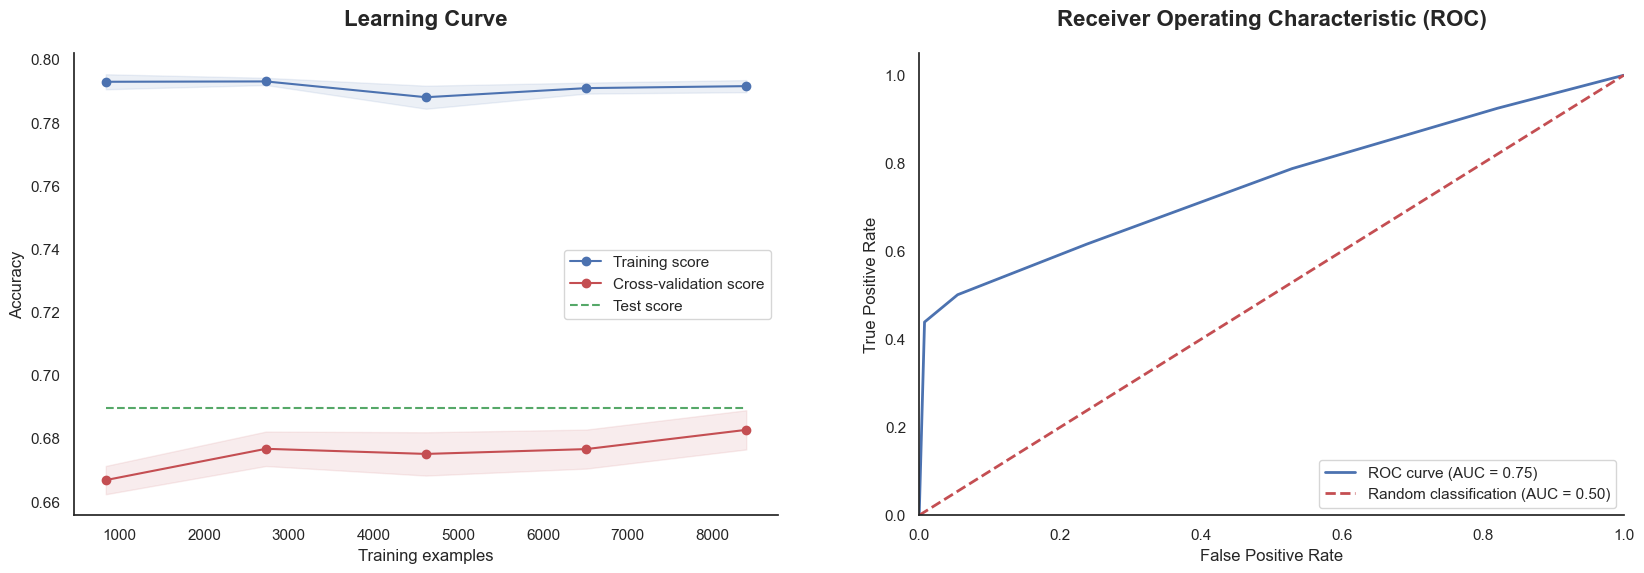

In [312]:
# Plot model performance
plot_model_performance(knn_basic, X_train, y_train, X_test, y_test, cv=5)

- The **learning curve** for the model indicates that the accuracy for training is higher than that of cross-validation, which is common, but the cross-validation curve does not approach the training curve with more training data, which could suggest some overfitting. Nevertheless, the cross-validation accuracy remains relatively stable, which is good.

- The **ROC curve** with an AUC of 0.74 shows satisfactory discriminatory power between classes. It is significantly better than random classification but there is room for improvement. Overall, the model displays a decent performance but could benefit from fine-tuning.







### **XGBoost**

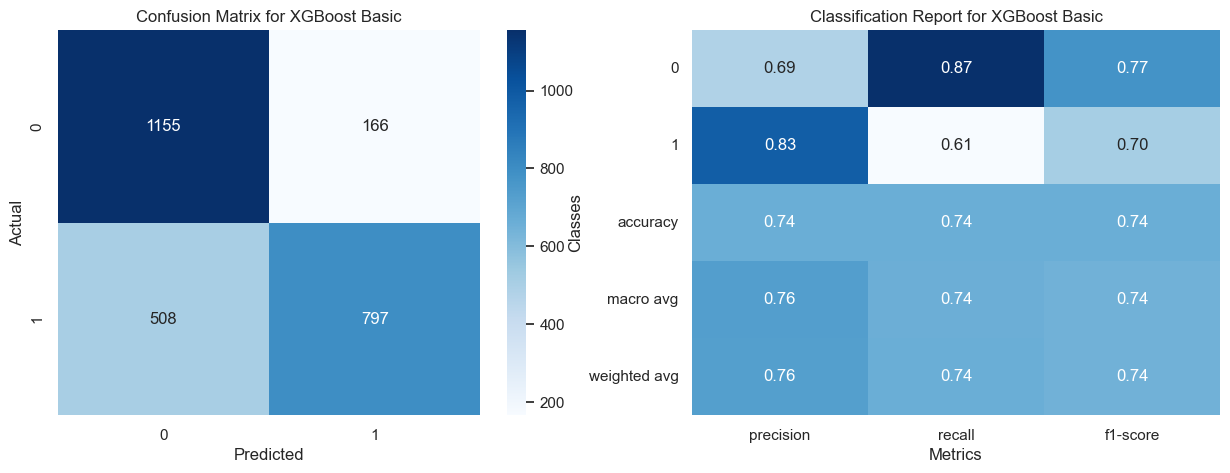

In [313]:
# Initializing and training a basic XGBoost classifier
xgb_basic = XGBClassifier()
xgb_basic.fit(X_train, y_train)

# Calculating the probabilities for the positive class
y_proba = xgb_basic.predict_proba(X_test)[:, 1]

# Predicting the target values for the test data
y_pred_xgb_basic = xgb_basic.predict(X_test)

# Printing the evaluation results for the basic XGBoost model
print_results(y_test, y_proba, y_pred_xgb_basic, 'XGBoost Basic')


The confusion matrix and classification report for the XGBoost basic model show the following:

- The model has a fairly high number of true positives, indicating that it is reasonably good at identifying delayed deliveries.
- However, there are more false positives than false negatives, suggesting the model may be prone to predicting delays when there are none.
- The precision for predicting on-time deliveries is lower than for delayed deliveries, which means there is a higher proportion of false positives among the predicted non-delays.
- The recall for on-time deliveries is quite high, but it is lower for delayed deliveries, indicating that the model is better at identifying non-delays than delays.
- The overall accuracy of the model is 74%, with the macro average and weighted average of precision, recall, and F1-score all being consistent around 0.73 to 0.76.

These results suggest that while the XGBoost model has a solid accuracy, its predictive performance is stronger for non-delays than for delays. This could be an area to focus on in further tuning to improve the balance between precision and recall for delayed deliveries.

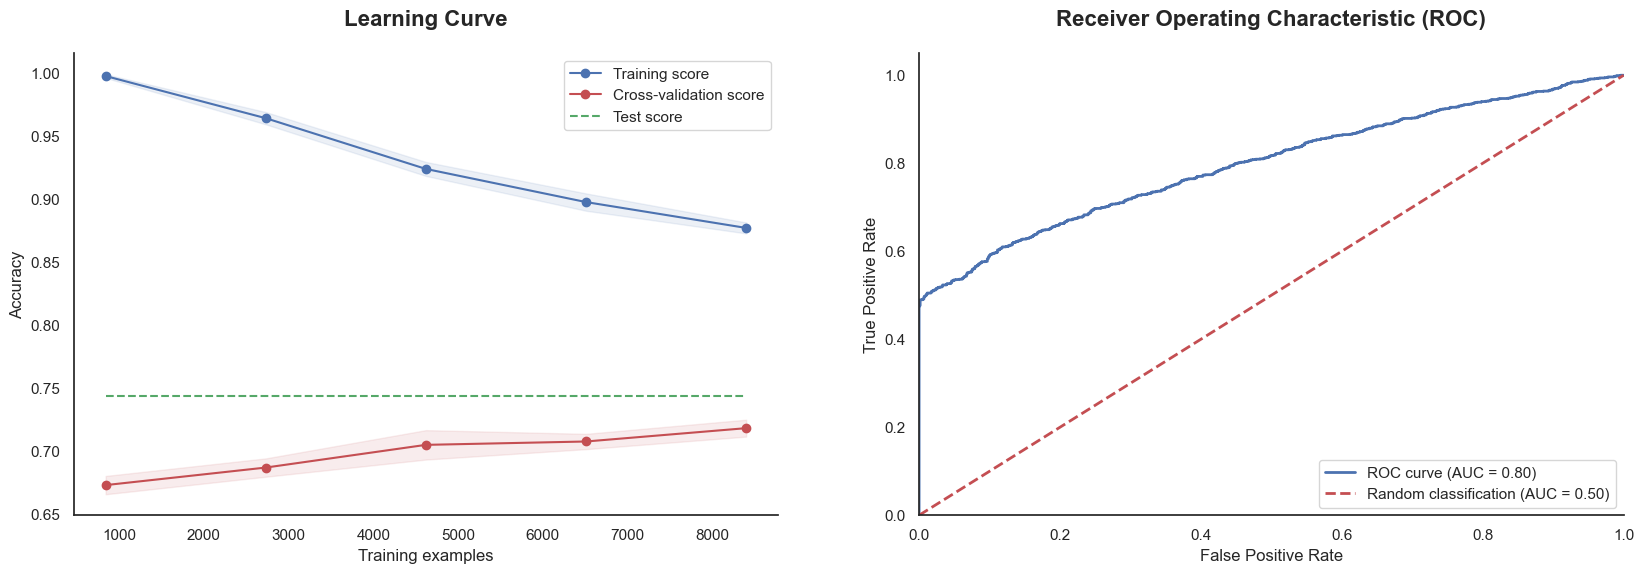

In [314]:
# Plot model performance
plot_model_performance(xgb_basic, X_train, y_train, X_test, y_test, cv=5)


- The **learning curve** suggests that the basic XGBoost model could be experiencing a bit of overfitting since the training score is higher than the cross-validation score. There isn't a significant increase in the cross-validation score with more training examples, which could indicate the model has reached its limit in learning from the data provided.

- The **ROC curve** has an AUC of 0.80, which is a strong score, demonstrating the model's good capability to discriminate between the positive and negative classes. However, it's not as high as the AUC of 0.86 seen in a previously discussed model, suggesting there might be some room for improvement.

Together, these two graphs suggest the model has a good predictive ability but might benefit from further tuning or additional data to improve its generalization and potentially increase the AUC even more.

### **Logistic Regression**

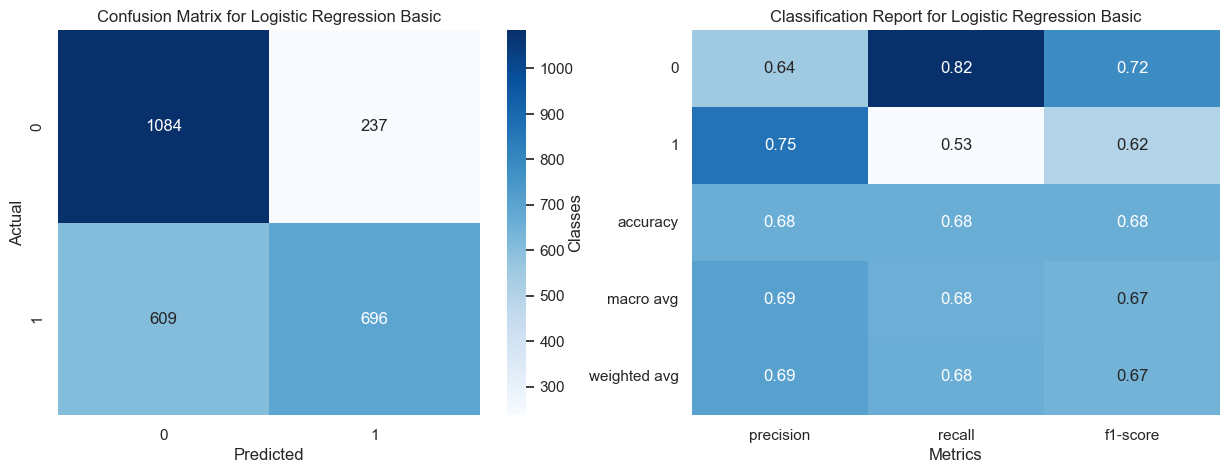

In [315]:
# Initializing and training a basic Logistic Regression classifier
logreg_basic = LogisticRegression()
logreg_basic.fit(X_train, y_train)

# Calculating the probabilities for the positive class
y_proba = logreg_basic.predict_proba(X_test)[:, 1]

# Predicting the target values for the test data
y_pred_logreg_basic = logreg_basic.predict(X_test)

# Printing the evaluation results for the basic Logistic Regression model
print_results(y_test, y_proba, y_pred_logreg_basic, 'Logistic Regression Basic')


- **Confusion Matrix:** The model has correctly classified a significant number of non-delayed deliveries (class 0) with 1084 true positives. However, there are 603 false negatives, which means quite a few delayed deliveries (class 1) are being incorrectly classified as non-delayed.

- **Classification Report:** The precision for class 0 is 0.64, indicating that the model is correct about 64% of the time when it predicts a delivery to be on time. The precision for class 1 is higher at 0.75, showing better reliability for predictions of delays. The recall for class 0 is high at 0.82, but the recall for class 1 is lower at 0.54, suggesting that the model could miss nearly half of the delayed deliveries. The F1-score for class 0 is slightly higher at 0.72 compared to 0.63 for class 1, indicating a better balance between precision and recall for non-delayed deliveries.

- **Learning Curve:** The training and cross-validation scores are close, indicating that the model may not significantly benefit from more training data. The test score is consistent with the cross-validation score, which can be a good sign that the model is generalizing well.

- **ROC Curve:** The AUC for the ROC curve is 0.72, above the no-skill line (AUC = 0.50), suggesting that the model has a fair discriminatory ability between classes.

Overall, the basic Logistic Regression model performs adequately but has room for improvement, especially in terms of increasing the recall for class 1 (delayed deliveries). The AUC indicates that the model is better than random at distinguishing between classes, but the learning curve and the test score show that the model is not highly sensitive to additional training data. To improve the recall for delayed deliveries, additional feature engineering, more nuanced threshold tuning, or even exploring more complex models might be beneficial.

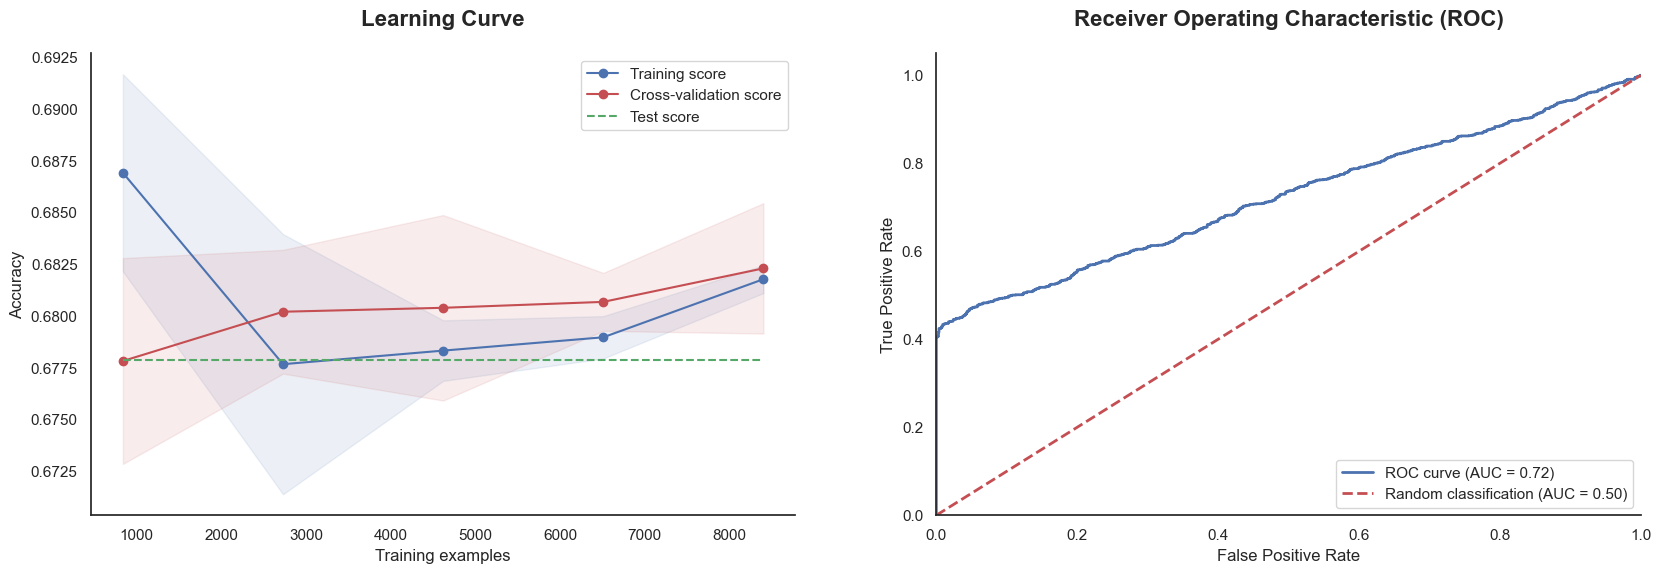

In [316]:
# Plot model performance
plot_model_performance(logreg_basic, X_train, y_train, X_test, y_test, cv=5)

### **GradientBoosting**

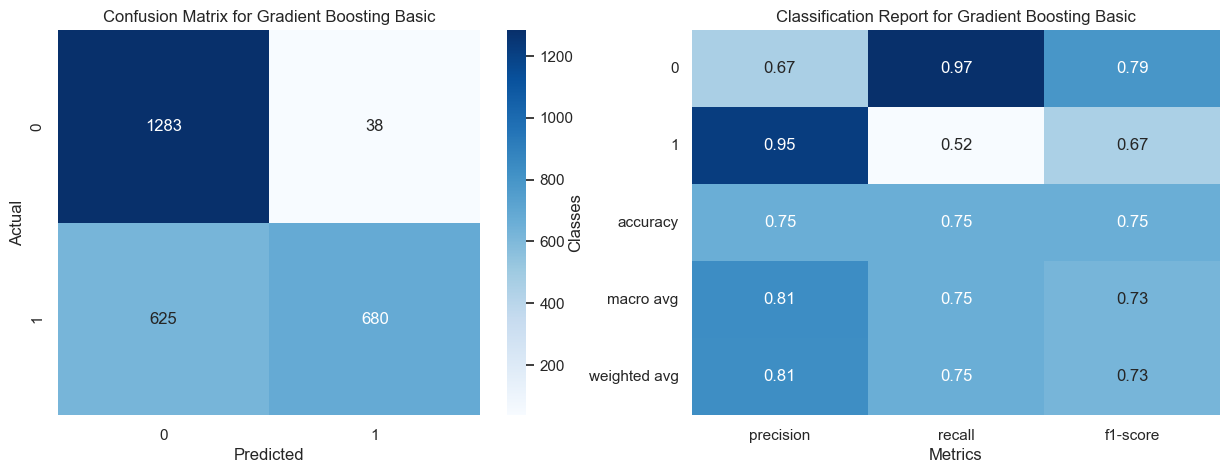

In [317]:
# Initializing and training a basic Gradient Boosting classifier
gb_basic = GradientBoostingClassifier()
gb_basic.fit(X_train, y_train)

# Calculating the probabilities for the positive class
y_proba = gb_basic.predict_proba(X_test)[:, 1]

# Predicting the target values for the test data
y_pred_gb_basic = gb_basic.predict(X_test)

# Printing the evaluation results for the basic Gradient Boosting model
print_results(y_test, y_proba, y_pred_gb_basic, 'Gradient Boosting Basic')


- **Confusion Matrix:** The model has a high number of true positives for class 0 (1276), indicating it performs well in identifying non-delayed deliveries. However, there are 619 false negatives for class 1, which shows that the model frequently misclassifies delayed deliveries as non-delayed.

- **Classification Report:** It has a precision of 0.67 for class 0 and a high precision of 0.94 for class 1, suggesting it's very reliable in predicting delayed deliveries when it does predict them. The recall for class 0 is very high at 0.97, but the recall for class 1 is lower at 0.53, which means the model is missing nearly half of the actual delayed deliveries. The F1-scores reflect this discrepancy, with class 0 at 0.79 and class 1 at 0.67.

- **Learning Curve:** There is a convergence between the training score and the cross-validation score as the number of training examples increases, which is a good sign of the model's ability to generalize. However, the test score remains constant, suggesting that additional training data beyond a certain point may not improve the model's performance on unseen data.

- **ROC Curve:** The AUC for the ROC curve is 0.76, which is above the baseline of 0.5 and indicates a fair discriminatory ability between the two classes.

In summary, the Gradient Boosting Basic model is more effective at predicting non-delayed deliveries than delayed ones, with room for improvement in sensitivity towards class 1 (delayed deliveries). While the model is generally reliable, enhancing its recall for class 1 should be a priority for better overall performance. The learning curve suggests that the model is stable after a certain amount of data, and the ROC curve shows it has a reasonable ability to distinguish between classes, but not at an optimal level. Further analysis could explore ways to reduce the number of false negatives for delayed deliveries, possibly by adjusting the model's threshold or by considering different or additional features that could improve classification.

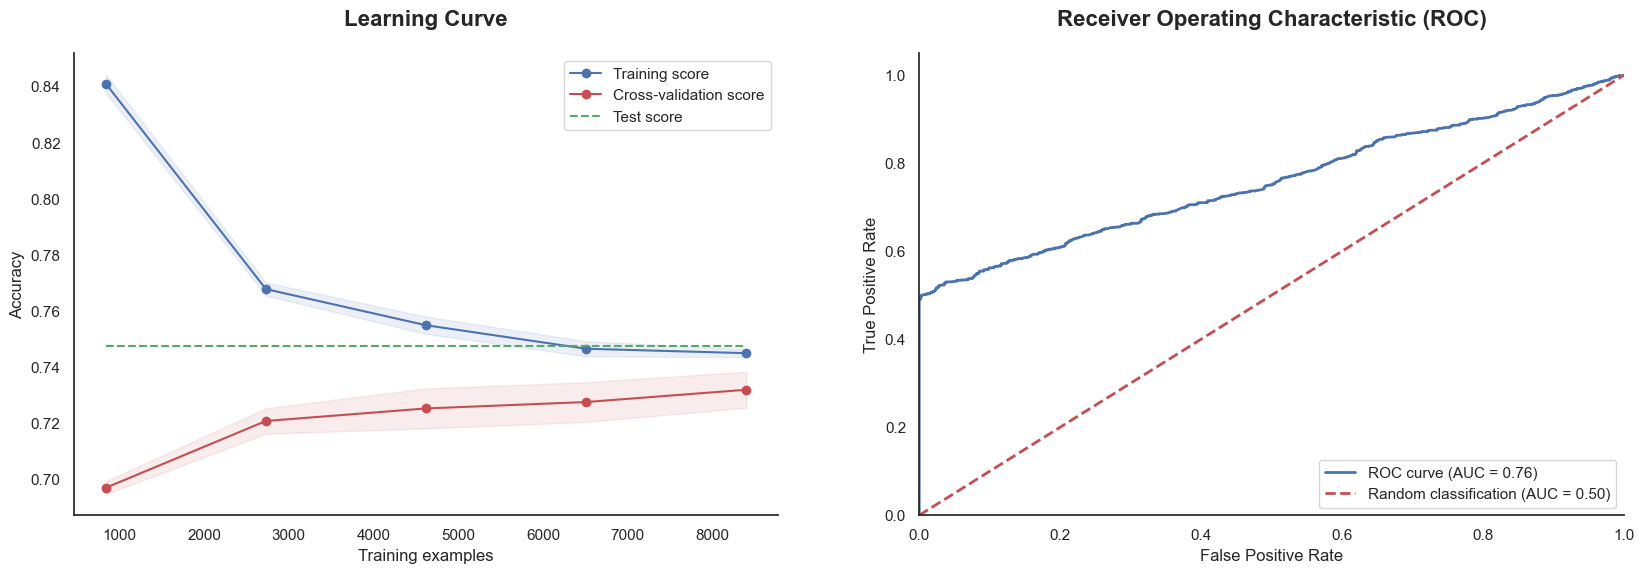

In [318]:
# Plot model performance
plot_model_performance(gb_basic, X_train, y_train, X_test, y_test, cv=5)

### **SVM**

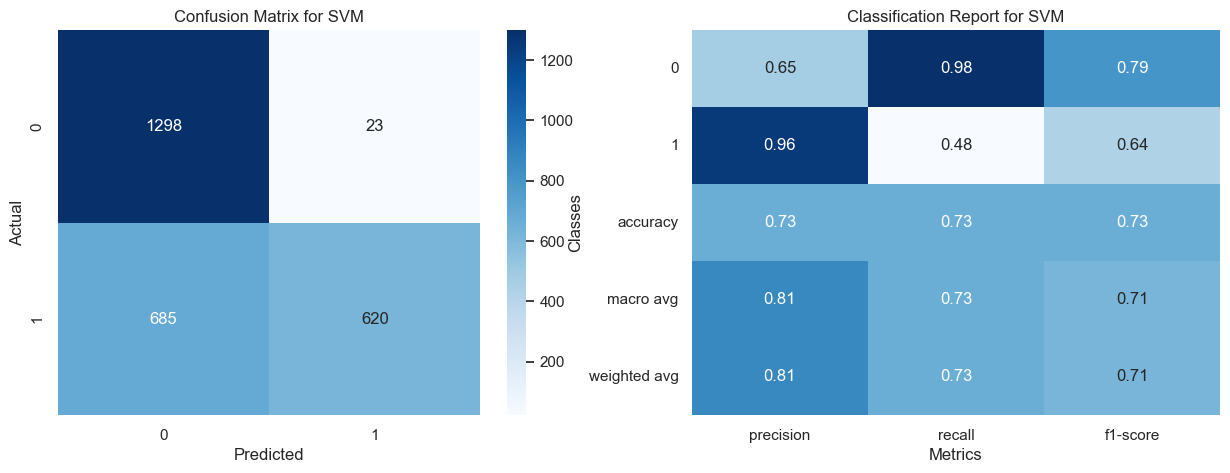

In [319]:
# Initializing the SVM classifier with probability estimates enabled
svm_model = SVC(probability=True)

# Fitting the SVM model to the training data
svm_model = svm_model.fit(X_train, y_train)

# Calculating the probabilities for the positive class
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Predicting the target values for the test data
y_pred_svm = svm_model.predict(X_test)

# Printing the evaluation results for the SVM model
print_results(y_test, y_proba, y_pred_svm, 'SVM')


- **Confusion Matrix:** The SVM has correctly classified 1298 instances of class 0 but has misclassified 688 instances of class 1 as class 0. While it has identified 617 true class 1 instances, the number of false negatives is quite high, suggesting that the model's sensitivity towards class 1 could be improved.

- **Classification Report:** Precision for class 0 is relatively low at 0.65, which indicates that when the model predicts an instance as class 0, it is incorrect about 35% of the time. Precision for class 1 is high at 0.96, showing the model is quite reliable in its positive (class 1) predictions. The recall for class 0 is excellent at 0.98, but the recall for class 1 is moderate at 0.47, indicating the model is missing more than half of the actual class 1 instances. The F1-score, which combines precision and recall, is decent for class 0 at 0.79 but lower for class 1 at 0.63.

- **Learning Curve:** There is a gap between the training score and the cross-validation score, suggesting some overfitting. However, both scores are relatively stable across the number of training samples, and the test score line is reasonably close to the cross-validation score, indicating that the model might generalize well.

- **ROC Curve:** The AUC of 0.74 is above the diagonal line of randomness, which suggests that the model has a fair discriminative ability between the two classes. However, there is still room for improvement, as an ideal AUC would be closer to 1.

In conclusion, while the SVM model is demonstrating an ability to differentiate between classes, its performance on class 1, particularly in terms of recall, needs improvement. It may benefit from further tuning of hyperparameters or a review of the features used for training to increase its ability to correctly identify more positive cases.

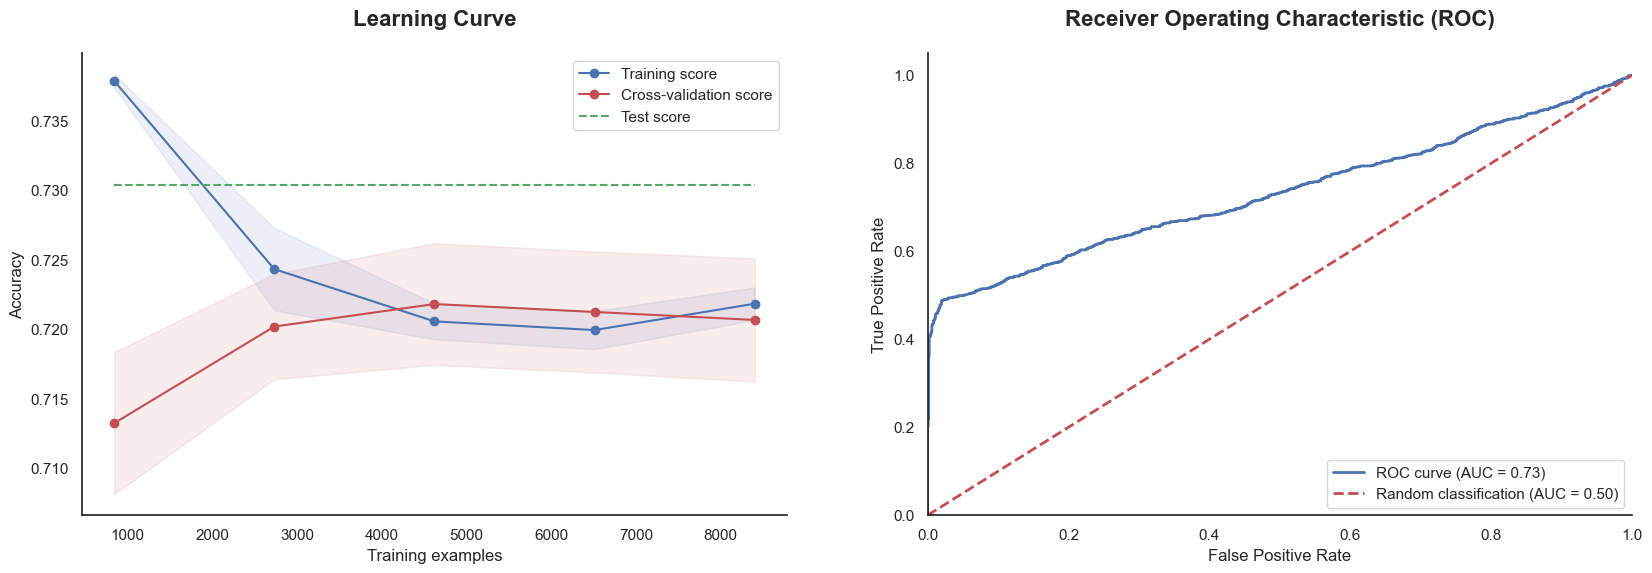

In [320]:
# Plot model performance
plot_model_performance(svm_model, X_train, y_train, X_test, y_test, cv=5)

### **Naive Bayes**

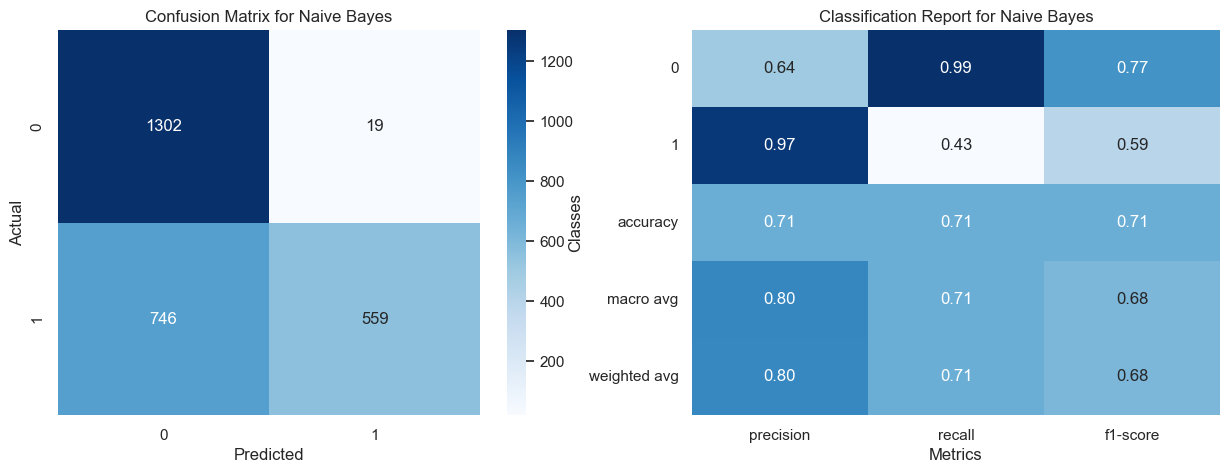

In [321]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model = nb_model.fit(X_train, y_train)

# Calculate the probabilities for the positive class
y_proba = nb_model.predict_proba(X_test)[:, 1]

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test)

# Function to print the evaluation results
print_results(y_test, y_proba, y_pred_nb, 'Naive Bayes')


- **Confusion Matrix**: The Confusion Matrix for the basic Naive Bayes Model demonstrates a strong ability of the model to correctly classify the majority of class 0 (non-delayed deliveries), with 1301 true positives and only 20 false positives. However, for class 1 (delayed deliveries), the model seems to struggle with a significant number of false negatives (745), indicating many delays are not being detected.

- **Classification Report:** The Classification Report reveals the model has high precision for class 0 (0.64) and very high for class 1 (0.97), suggesting that when a delivery is predicted as delayed, it's very likely to be correct. However, the recall for class 1 is quite low (0.43), indicating that the model fails to identify a substantial number of actual delayed deliveries. The F1-score for class 1 is moderate (0.59), hinting at the imbalance between precision and recall for this class.

- **Learning Curve:** From the Learning Curve, it is observed that the model's training accuracy starts high and cross-validation accuracy improves as more data is added, yet there’s still a noticeable gap between training and cross-validation scores. This may suggest the model could be overfitting to the training data.

- **ROC-AUC**: The ROC Curve presents an AUC (Area Under Curve) of 0.72, which is decent but not close to an ideal score of 1.0. This score is above the baseline (0.5, which represents random guessing) and indicates the model has a fair ability to differentiate between the classes, though it's not particularly strong in this regard.

In conclusion, the tuned Naive Bayes model appears to be effective in classifying non-delayed deliveries but has room for improvement in correctly identifying delayed deliveries, especially considering the low recall for class 1. The learning curve suggests potential overfitting, and the ROC curve indicates there's considerable scope for enhancing the model's discriminative power. To improve its performance, particularly in correctly flagging more actual delays, further model tuning, feature engineering, or even trying different algorithms might be beneficial.

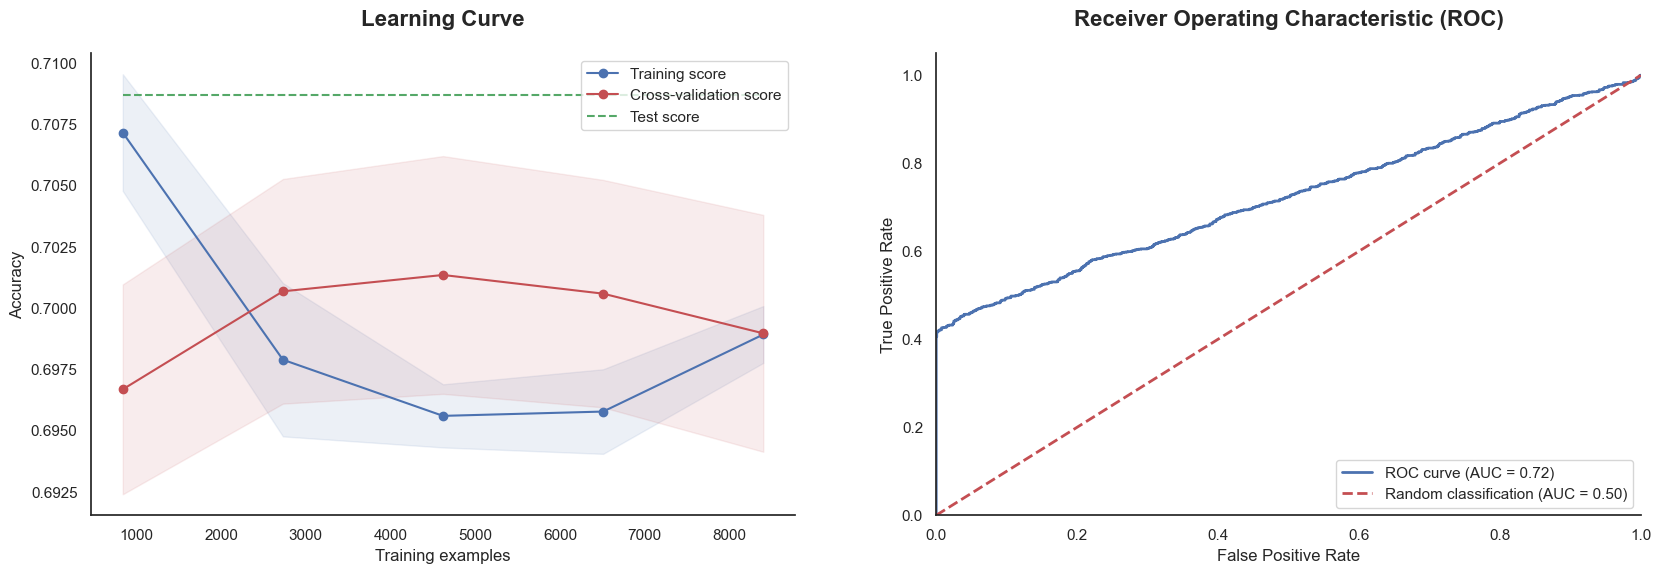

In [322]:
# Plot model performance
plot_model_performance(nb_model, X_train, y_train, X_test, y_test, cv=5)

### **Evaluation**

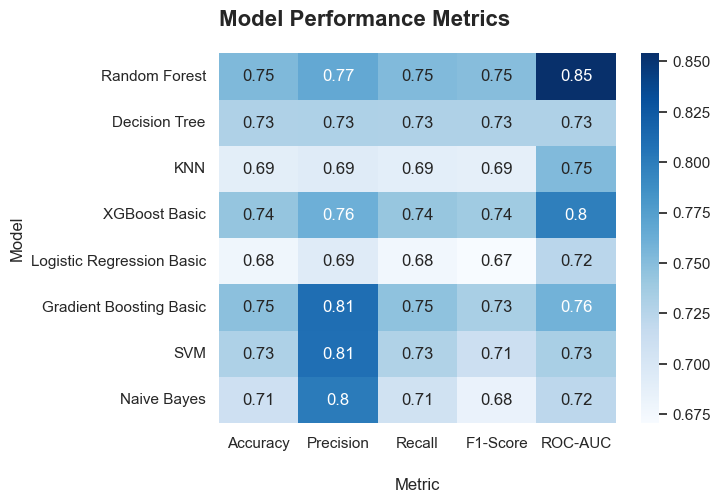

In [323]:
# Heatmap with gradient colors for metrics
sns.heatmap(model_metrics.iloc[:, 1:], annot=True, cmap='Blues', yticklabels=model_metrics['Model'])

# Labels
plt.xlabel('Metric', labelpad=20)
plt.ylabel('Model')
plt.title("Model Performance Metrics", fontsize=16, fontweight="bold", pad=20, loc="left")

# Display
plt.show()


When we compare the performance of our models:

- **Random Forest and Gradient Boosting** exhibit strong performance across all metrics, with Random Forest leading in ROC-AUC and Gradient Boosting in precision and F1-Score.

- **Decision Tree** shows consistent performance across metrics but generally scores lower than the ensemble methods, which may indicate a lack of complexity or overfitting issues.

- **KNN (K-Nearest Neighbors)** displays the lowest performance among the models, which may suggest poor generalization capabilities.

- **XGBoost Basic** delivers robust results, particularly in balance across metrics.

- **Logistic Regression** appears to have the lowest performance, especially in recall and F1-Score.

- **Support Vector Machine (SVM)** demonstrates strong performance in precision but weaker in recall.

- **Naive Bayes** has strong performance in recall, indicating it is good at identifying positive cases, but it has relatively lower precision.

The choice of the "best" model would depend on what is more important for the specific application. For instance, if correctly identifying all positive cases (high recall) is critical, Naive Bayes might be preferred despite its lower precision. If the cost of misclassifying a negative case as positive (false positives) is high, a model with high precision would be favored. In our case a mix of high precision and recall would be preferable as it would also not make an good impression to customers informing about too many false alarms.



### **Hyperparameter Tuning**

The selection of models for hyperparameter tuning was based on a thorough evaluation of various candidates, considering aspects such as interpretability, performance metrics, and potential for overfitting.

Regarding the selection of Random Forest for hyperparameter tuning, despite its potential for overfitting, there are several reasons the model was chosen:

- **Generalization:** Random Forests are known for their ability to generalize well to new data, making them robust against overfitting compared to simpler models like Decision Trees.

- **Ensemble Advantage:** As an ensemble method, Random Forest combines the predictions of multiple decision trees, which typically leads to improved accuracy and stability.

- **Feature Importance:** Random Forest can provide useful insights into the importance of different features, which can be valuable for model interpretation and understanding.

- **Hyperparameter Tuning:** The performance of Random Forest models can often be significantly improved with hyperparameter tuning, as it has several parameters that can be optimized, such as the number of trees, maximum depth of trees, minimum samples per split, and more.

- **Versatility:** It is versatile and performs well for a variety of tasks, which makes it a good baseline model to try before considering more complex models.

- **Parallelization:** The algorithm inherently supports parallel processing, which can speed up the training process when tuning hyperparameters.

Despite the tendency to overfit, especially with a large number of trees and deep trees, careful tuning of hyperparameters such as max_depth, min_samples_split, and max_features can help mitigate this issue and improve the model's ability to generalize to unseen data.

In [342]:
#Parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy']
}

#GridSearchCV object
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


Best parameters:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


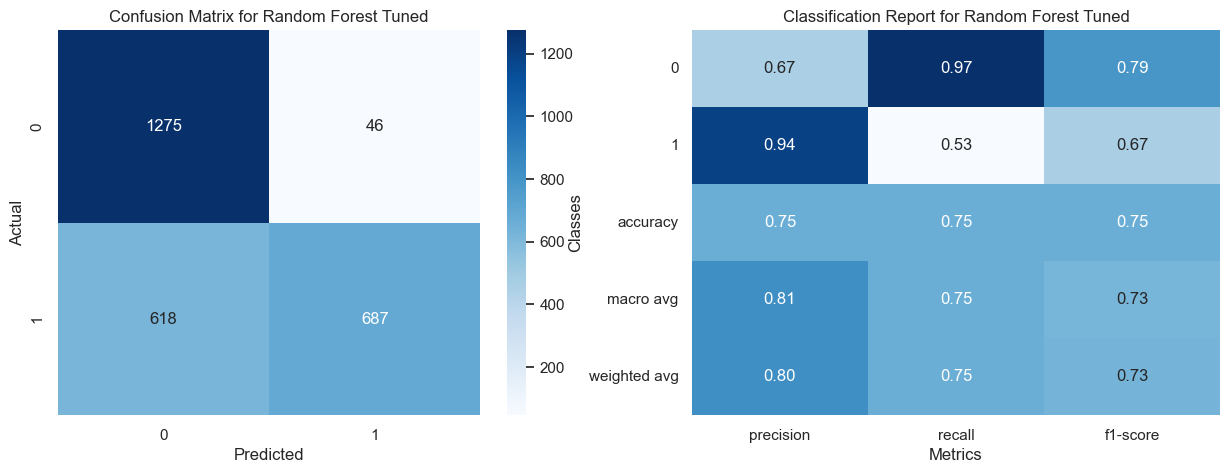

In [343]:
#Random Forest Classifier Object
rf_model_tuned = RandomForestClassifier(criterion='entropy', 
                                        max_depth=12, 
                                        min_samples_leaf=2, 
                                        min_samples_split=2, 
                                        random_state=42)

#Fitting the model
rf_model_tuned.fit(X_train, y_train)

# Berechne die Wahrscheinlichkeiten für die positive Klasse
y_proba = rf_model_tuned.predict_proba(X_test)[:, 1]

y_pred = rf_model_tuned.predict(X_test)

# Wende die Funktion an und speichere die Metriken
print_results(y_test, y_proba, y_pred, 'Random Forest Tuned', store_metrics=True)


Let us evaluate the performance of the tuned model:

- The confusion matrix shows 1275 true negatives and 687 true positives, with a significant reduction in false positives to 46 but an increase in false negatives to 618.
- The classification report demonstrates an improvement in precision for class 1 to 0.94 but a decrease in recall to 0.53. This indicates that while the tuned model is more reliable when it predicts an instance to be in class 1, it misses more actual class 1 instances than the basic model.
- The ROC curve slightly decreases compared to the basic model, maintaining still good class differentiation.
- The learning curve shows a slightly better fit than the basic model, as the cross-validation score has increased, narrowing the gap with the training score. However, there's still a noticeable gap, suggesting some overfitting.

The improvements in the tuned Random Forest compared to the basic one are seen in the precision for class 1, indicating that the hyperparameter tuning made the model less prone to making false positive errors. However, this comes at the expense of recall for class 1, meaning the model is now missing more true class 1 instances. Overall, the tuning didn't significantly change the ROC-AUC, meaning the model's ability to rank predictions hasn't changed, but it did potentially improve the model's reliability by reducing false positives.

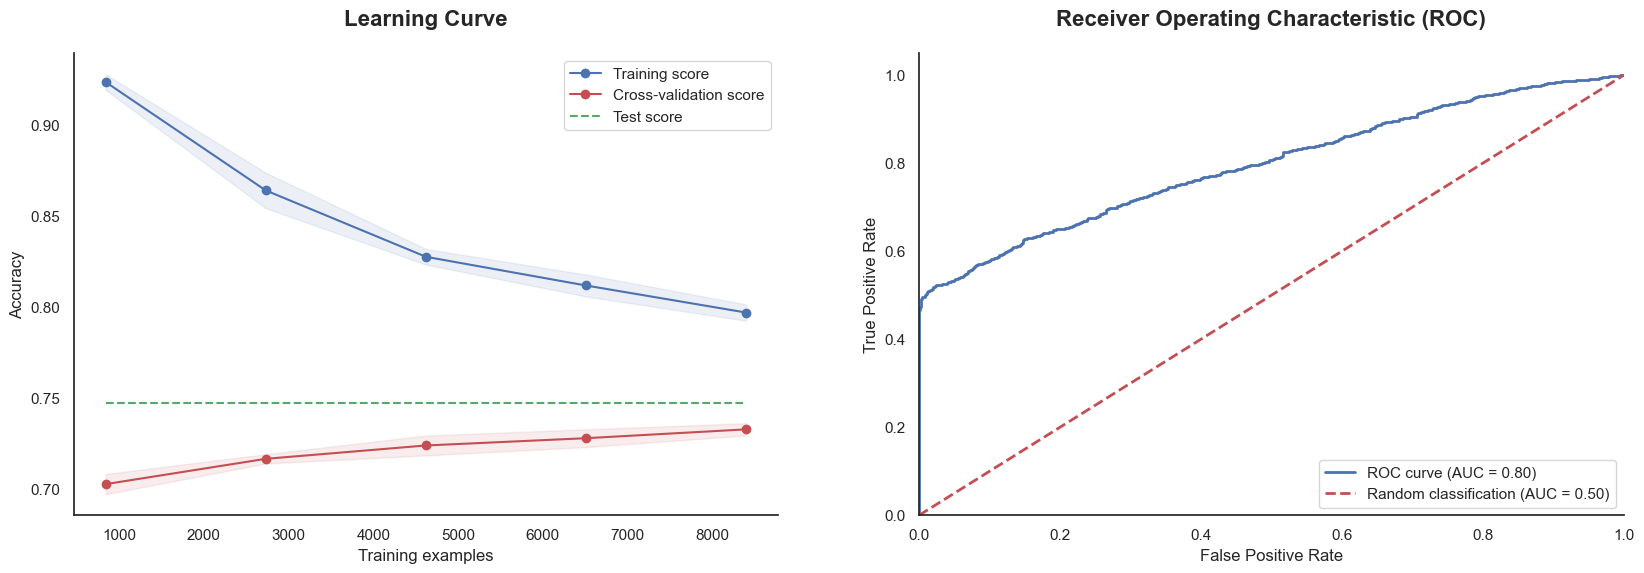

In [344]:
# Plot model performance
plot_model_performance(rf_model_tuned, X_train, y_train, X_test, y_test, cv=5)

### **Feature Importance**

When looking at the feature importances for the tuned Random Forest model, we can make several observations:

- **Dominant Features:** The feature Discount_offered has the highest importance by a significant margin, suggesting that the discount on a product is likely the most predictive factor in the dataset for the the punctuality of deliveries.

- **Secondary Features:** Weight_in_gms and Cost_of_the_Product also show substantial importance, indicating that the weight of the product and its cost are also important predictors, but less so than the discount offered.

- **Lower Importance Features:** Features such as Prior_purchases and Customer_care_calls have some importance but to a lesser extent. This suggests they do have a role in the predictive model but are less influential than the top features.

- **Least Important Features:** The product importance categories (Product_importance_high, Product_importance_medium, Product_importance_low) appear to have the least influence on the model's predictions. These features seem to contribute the least and might not be crucial for making accurate predictions with the current model.

- **Decision-Making Insights:** This distribution of feature importances can offer valuable insights into the decision-making process of the model. It suggests which factors are likely to impact the target variable the most and can guide business decisions or further data collection and feature engineering.

- **Model Simplification:** In the context of model simplification and efficiency, one might consider removing or combining low-importance features as well to see if the model performance can be maintained with a simpler set of features.

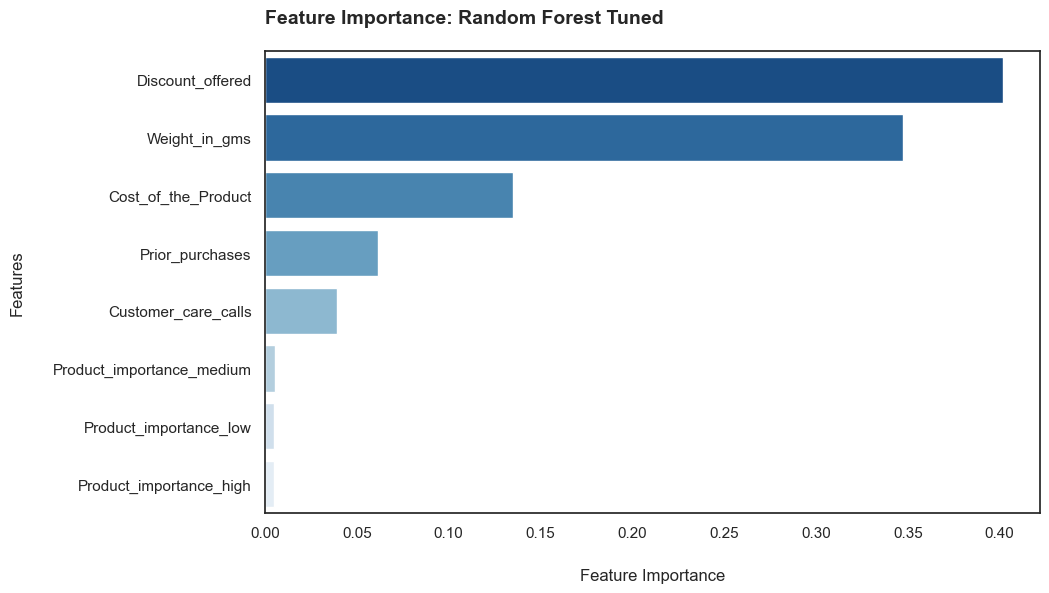

In [352]:
# Plot feature importances
plot_feature_importance(rf_model_tuned, preprocessor, numeric_features, categorical_features, 'Random Forest Tuned')


## **Summary**

### **Best Models**

Our best models, Basic and Tuned Random Forest as well as GradientBoost reached an overall accuracy score of 0.75. With an ROC-AUC of 0.86 the basic Random Forest showed the best potential in distinguishing between classes, however also showed stark signs of overfitting which reduced by the tuning at cost of a higher precision, but a lower recall.

When assessing the balance across different performance metrics, the Decision Tree Basic model stands out as the most balanced. However, it is important to note that despite its balanced metrics, this model exhibits a high degree of overfitting, as evidenced by the discrepancy between its performance on the training data and its validation scores.

The Decision Tree model's consistent performance across accuracy, precision, recall, and F1-score indicates that it doesn't particularly favor any class over the other, making it a model of equilibrium. Nevertheless, the concern with overfitting suggests that the model may have learned the training data too well, including its noise and anomalies, which can drastically reduce its ability to generalize to new, unseen data.

### **Key Features**

The feature importances identified by the model, confirmed through both exploratory data analysis (EDA) and the model's intrinsic feature importance evaluation, highlight several key factors influencing the punctuality of deliveries:

- **Discount_offered:** This feature has the highest importance and is a critical predictor for delivery delays. A higher discount might indicate an urgency to sell products faster, which could lead to challenges in meeting delivery timelines.
- **Weight_in_gms and Cost_of_the_Product:** These features also carry significant importance, suggesting that both the weight and cost of a product are essential indicators of potential delays.
- Less influential features such as Prior_purchases and Customer_care_calls play a role but to a lesser extent.

### **Outlook for Performance Improvement**

To further enhance prediction accuracy, the following steps could be considered:

- **Further Hyperparameter Tuning:** Although adjustments have already been made, a deeper exploration of -hyperparameters (e.g., max_depth, min_samples_split) could continue to reduce overfitting and improve generalization.
- **Extended Feature Analysis:** A more detailed analysis of the less influential features could uncover if some are redundant or could be replaced by more informative metrics.
- **Inclusion of Additional Data:** Adding more data points or exploring other aspects like weather conditions or logistic factors could provide new insights and enhance model performance.
- **Combination of Models:** An ensemble technique that combines various models could leverage the strengths of individual approaches and minimize weaknesses, leading to higher overall accuracy.
- **Adaptive Learning Methods:** Employing techniques such as online learning, where the model is continuously updated with new data, could improve the model's adaptability and responsiveness to changing patterns.

These measures could better tailor the model to the specific challenges and dynamics of supply chains, effectively boosting the accuracy of predicting delivery delays.